## Design

### Design

In this session, we will finally discuss the thing most people think of when they refer to "Software Engineering": the deliberate *design* of software.
We will discuss processes and methodologies for planned development of large-scale software projects: *Software Architecture*.

### Object-Oriented Design


The software engineering community has, in large part, focused on an object-oriented approach to the design and development of large scale software systems.
The basic concepts of object orientation are necessary to follow much of the software engineering conversation.


### Design processes


In addition to object-oriented architecture, software engineers have focused on the development of processes for robust, reliable software development. 
These codified ways of working hope to enable organisations to repeatably and reliably complete complex software projects in a way that minimises both development 
and maintainance costs, and meets user requirements.


### Design and research


Software engineering theory has largely been developed in the context of commercial software companies.

The extent to which the practices and processes developed for commercial software are applicable in a research context is itself an active area of research.



## More on Objects

### Object Based Programming Recap


We saw last lesson how to 

* create our own classes
* store data with member variables
* add functionality with member functions
* initialise objects with constructors


### Class design


The concepts we have introduced are common between different object oriented languages.
Thus, when we design our program using these concepts, we can think at an architectural level,
independent of language syntax.




In [1]:
class Particle(object):
    def __init__(self, position, velocity):
       self.position=position
       self.velocity=velocity
    def move(self, delta_t):
       self.position+= self.velocity*delta_t

``` cpp
class Particle {
    std::vector<double> position;
    std::vector<double> velocity;
    Particle(std::vector<double> position, std::vector<double> velocity);
    void move(double delta_t);
}
```

``` fortran
type particle
    real :: position
    real :: velocity
  contains
    procedure :: init
    procedure :: move
end type particle
```

### UML


UML is a conventional diagrammatic notation used to describe "class structures" and other higher level
aspects of software design.

Computer scientists get worked up about formal correctness of UML diagrams and learning the conventions precisely.
Working programmers can still benefit from using UML to describe their designs.


### YUML

We can see a YUML model for a Particle class with `position` and `velocity` data and a `move()` method using
the [YUML](http://yuml.me/) online UML drawing tool.

    http://yuml.me/diagram/boring/class/[Particle|position;velocity|move%28%29

Here's how we can use Python code to get an image back from YUML:

In [17]:
import requests
import IPython

In [27]:
def yuml(model):
    result=requests.get("http://yuml.me/diagram/boring/class/"+model)
    return IPython.core.display.Image(result.content)

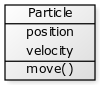

In [28]:
yuml("[Particle|position;velocity|move()]")

## Information Hiding


Sometimes, our design for a program would be broken if users start messing around with variables we don't want them to change.

Robust class design requires consideration of which subroutines are intended for users to use, and which are internal.
Languages provide features to implement this: access control. 

In python, we use leading underscores to control whether member variables and methods can be accessed from outside the class.




In [3]:
class MyClass(object):
    def __init__(self):
        self.__private_data=0
        self._private_data=0
        self.public_data=0
    
    def __private_method(self): pass
    def _private_method(self): pass
    def public_method(self): pass
    def called_inside(self):
        self.__private_method()
        self._private_method()
        self.__private_data=1
        self._private_data=1
        

MyClass().called_inside()
MyClass()._private_method() # Works, but forbidden by convention
MyClass().public_method() # OK

print MyClass()._private_data
print MyClass().public_data

0
0


In [4]:
MyClass().__private_method() # Generates error

AttributeError: 'MyClass' object has no attribute '__private_method'

In [5]:
print MyClass().__private_data # Generates error

AttributeError: 'MyClass' object has no attribute '__private_data'

### Property accessors


Python provides a mechanism to make functions appear to be variables. This can be used if you want to
change the way a class is implemented without changing the interface:




In [6]:
class Person(object):
    def __init__(self):
        self.name = "James Hetherington"

assert(Person().name == "James Hetherington")




becomes:




In [7]:
class Person(object):
    def __init__(self):
        self._first = "James"
        self._second = "Hetherington"

    @property
    def name(self):
        return self._first + " " + self._second

assert(Person().name == "James Hetherington")




Note that the code behaves the same way to the outside user.
The implementation detail is hidden by private variables.
In languages without this feature, such as C++, it is best to always
make data private, and always
access data through functions:




In [8]:
class Person(object):
    def __init__(self):
        self._name = "James Hetherington"
    def name(self):
        return self._name

assert(Person().name() == "James Hetherington")




But in Python this is unnecessary.


### Class Members


*Class*, or *static* members, belong to the class as a whole, and are shared between instances.




In [9]:
class Counted(object):
    number_created=0
    def __init__(self):
        Counted.number_created+=1
    @classmethod
    def howMany(cls):
        return cls.number_created

Counted.howMany() # 0
x=Counted()
Counted.howMany() # 1
z=[Counted() for x in range(5)]
Counted.howMany() # 6 

6

### Object-based vs Object-Oriented


So far we have seen only object-based programming, not object-oriented programming.

Using Objects doesn't mean your code is object-oriented.

To understand object-oriented programming, we need to introduce **polymorphism** and **inheritance**.


## Inheritance


* Inheritance allows related classes to share code
* Inheritance allows a program to reflect the *ontology* of kinds of thing in a program.


### Ontology and inheritance


* A bird is a kind of animal
* An eagle is a kind of bird
* A starling is also a kind of bird

* All animals can be born and die
* Only birds can fly (Ish.)
* Only eagles hunt
* Only starlings flock


### Inheritance in python

In [10]:
class Animal(object):
    def beBorn(self): print "I exist"
    def die(self): print "Argh!"

class Bird(Animal):
    def fly(self): print "Whee!"

class Eagle(Bird):
    def hunt(self): print "I'm gonna eatcha!"

Eagle().beBorn()
Eagle().hunt()

I exist
I'm gonna eatcha!


### Inheritance terminology


* A *derived class* _derives_ from a *base class*
* A *subclass* _inherits_ from a *superclass*

(These are different terms for the same thing.)

* Eagle is a subclass of the Animal superclass.
* Animal is the base class of the Eagle derived class


### Inheritance and constructors

In [11]:
class Animal(object):
    def __init__(self, age):
        self.age=age

class Person(Animal):
    def __init__(self, age, name):
        super(Person, self).__init__(age)
        self.name=name

### Inheritance UML diagrams

UML shows inheritance with an open triangular arrow pointing from subclass to superclass.

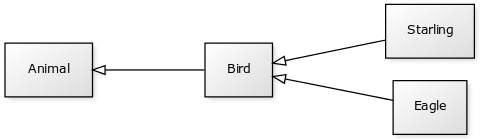

In [30]:
yuml("[Animal]^-[Bird],[Bird]^-[Eagle],[Bird]^-[Starling]%")

### Aggregation vs Inheritance


If one object *has* or *owns* one or more objects, this is *not* inheritance.

For example, in my solution to the Boids task from last week, the overal Model owned several Boids,
and each Boid owned two 2-vectors, one for position and one for velocity.


### Aggregation in UML

The Boids situation can be represented thus:

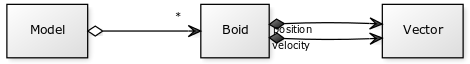

In [31]:
yuml("[Model]<>-*>[Boid],[Boid]position++->[Vector],[Boid]velocity++->[Vector]%")

The open diamond indicates **Aggregation**, the closed diamond **composition**.
(A given boid might belong to multiple models, a given position vector is forever part of the corresponding Boid.)

The asterisk represents cardinality, a model may contain multiple Boids.

### Refactoring to inheritance


Smell: Repeated code between two classes which are both ontologically subtypes of something

Before:




In [32]:
class Person(object):
    def __init__(self, age, job): 
        self.age = age
        self.job = job
    def birthday(self): 
        self.age += 1

class Pet(object):
    def __init__(self, age, owner): 
        self.age = age
        self.owner = owner
    def birthday(self): 
        self.age += 1




After:




In [33]:
class Animal(object):
    def __init__(self, age): 
        self.age = age
    def birthday(self): 
        self.age += 1

class Person(Animal):
    def __init__(self, age, job):
        self.job = job
        super(Person, self).__init__(age)

## Polymorphism

### Polymorphism

In [35]:
class Dog(object):
    def noise(self):
        return "Bark"

class Cat(object):
    def noise(self):
        return "Miaow"

class Pig(object):
    def noise(self): return "Oink"

class Cow(object):
    def noise(self): return "Moo"

animals=[Dog(), Dog(), Cat(), Pig(), Cow(), Cat()]
for animal in animals:
    print animal.noise()

Bark
Bark
Miaow
Oink
Moo
Miaow





This will print "Bark Bark Miaow Oink Moo Miaow"

If two classes support the same method, but it does different things for the two classes, 
then if an object is of an unknown class, calling the method will invoke the version for
whatever class the instance is an instance of.


### Polymorphism and Inheritance


Often, polymorphism uses multiple derived classes with a common base class.
However, duck typing in Python means that all that is required is that the 
types support a common **Concept** (Such as iterable, or container, or, in this case, the
Noisy concept.)

A common base class is used where there is a likely **default** that you want several
of the derived classes to have.




In [36]:
class Animal(object):
    def noise(self): return "I don't make a noise."

class Dog(Animal):
    def noise(self): return "Bark"

class Worm(Animal):
    pass

class Poodle(Animal):
    pass

animals=[Dog(), Worm(), Pig(), Cow(), Poodle()]
for animal in animals:
    print animal.noise()

Bark
I don't make a noise.
Oink
Moo
I don't make a noise.


### Undefined Functions and Polymorphism


In the above example, we put in a dummy noise for Animals that don't know what type they are.

Instead, we can explicitly deliberately leave this undefined, and we get a crash if we access an undefined method.




In [38]:
class Animal(object): pass

class Worm(Animal): pass

In [39]:
Worm().noise() # Generates error

AttributeError: 'Worm' object has no attribute 'noise'

### Refactoring to Polymorphism


Smell: a function uses a big set of `if` statements or a `case` statement to decide what to do:

Before:




In [41]:
class Animal(object):
    def __init__(self,type): 
        self.type=type
        
    def noise(self): 
        if self.type=="Dog":
            return "Bark"
        elif self.type=="Cat":
            return "Miaow"
        elif self.type=="Cow":
            return "Moo"

which is better replaced by the code above.

### Interfaces and concepts


In C++, it is common to define classes which declare dummy methods, called "virtual" methods, which specify
the methods which derived classes must implement. Classes which define these methods, which cannot be instantiated
into actual objects, are called "abstract base" classes or "interfaces".

Python's Duck Typing approach means explicitly declaring these is unnesssary: any class concept which implements
appropriately named methods will do. These as user-defined **concepts**, just as "iterable" or "container" are 
built-in Python concepts. A class is said to "implement and interface" or "satisfy a concept".


### Interfaces in UML

Interfaces implementation in UML is indicated thus:

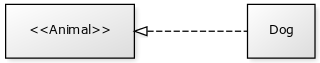

In [42]:
yuml("[<<Animal>>]^-.-[Dog]")

### Further UML


UML is a much larger diagram language than the aspects we've shown here.

* Message sequence charts show signals passing back and forth between objects ([Web Sequence Diagrams](https://www.websequencediagrams.com/))

* Entity Relationship Diagrams can be used to show more general relationships between things in a system






## Patterns

### Class Complexity


We've seen that using object orientation can produce quite complex class structures, with classes owning each other, instantiating each other,
and inheriting from each other.

There are lots of different ways to design things, and decisions to make.

> Should I inherit from this class, or own it as a member variable? ("is a" vs "has a")


### Design Patterns


Programmers have noticed that there are certain ways of arranging classes that work better than others.

These are called "design patterns".

They were first collected on one of the [world's first Wikis](http://c2.com/cgi/wiki?WelcomeVisitors), 
as the [Portland Pattern Repository](http://c2.com/cgi-bin/wiki?PatternIndex)


### Reading a pattern


A description of a pattern in a book such as the [Gang Of Four](http://www.amazon.co.uk/Design-patterns-elements-reusable-object-oriented/dp/0201633612)
book usually includes:

* Intent
* Motivation
* Applicability
* Structure
* Participants
* Collaborations
* Consequences
* Implementation
* Sample Code


### Introducing Some Patterns


There are lots and lots of design patterns, and it's a great literature to get into to
read about design questions in programming and learn from other people's experience.

We'll just show a few in this session:

* Factory Method
* Builder
* Handle-Body
* Strategy


## Factory Pattern

### Factory Pattern


Here's what the Gang of Four Book says about Factory Method:

Intent:  Define an interface for creating an object, but let subclasses decide which class to instantiate.
Factory Method lets a class defer instantiation to subclasses.

Applicability: Use the Factory method pattern when:

* A class can't anticipate the class of objects it must create
* A class wants its subclasses to specify the objects it creates

This is pretty hard to understand, so let's look at an example.


### Factory UML

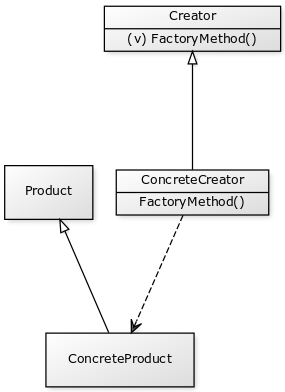

In [43]:
yuml("[Product]^-[ConcreteProduct], [Creator| (v) FactoryMethod()]^-[ConcreteCreator| FactoryMethod()], [ConcreteCreator]-.->[ConcreteProduct]")

### Factory Example


An "agent based model" is one like the Boids model from last week:
agents act and interact under certain rules. Complex phenomena can be described by simple
agent behaviours.




In [44]:
class AgentModel(object):
  def simulate(self):
    for agent in agents:
      for target in agents:
        agent.interact(target)
      agent.simulate()

### Agent model constructor


This logic is common to many kinds of Agent based model, so we can imagine a common class
for agent based models: the constructor could parse a configuration specifying how many agents of each type to create,
their initial conditions and so on.

However, this common constructor doesn't know what kind of agent to create; as a common base, it could be a model of boids,
or the agents could be remote agents on foreign servers, or they could even be physical hardware robots connected to the driving model
over Wifi!

We need to defer the construction of the agents. We can do this with polymorphism: each derived class of the ABM can have an appropriate
method to create its agents:




In [45]:
class AgentModel(object):
  def __init__(self, config):
    self.agents=[]
    for agent_config in config:
      self.agents.append(self.create(**agent_config))




This is the *factory method* pattern: a common design solution to the need to defer the construction of daughter objects to a derived class.


### Agent derived classes

In [46]:
class BirdModel(AgentModel):
  def create(self, species):
    return Boid(species)




Agents are the base product, boids or robots are a ConcreteProduct.




In [47]:
class WebAgentFactory(AgentModel):
  def __init__(self, url):
    self.url=url
    connection=AmazonCompute.connect(url)
    AgentModel.__init__(self)
  def create(self, species):
    return OnlineAnimal(species, connection)




There is no need to define an explicit base interface for the "Agent" concept in Python: anything that responds to "simulate" and "interact" 
methods will do: this is our Agent concept.


### Refactoring to Patterns


I personally have got into a terrible tangle trying to make base classes which somehow
"promote" themselves into a derived class based on some code in the base class.

This is an example of an "Antipattern": like a Smell, this is a recognised Wrong Way
of doing things.

What I should have written was a Creator with a FactoryMethod.


## Builder

In [48]:
from mock import Mock

### Builder Pattern

Intent: Separate the steps for constructing a complex object from its final representation.

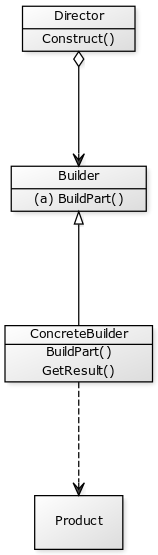

In [49]:
yuml("[Director|Construct()]<>->[Builder| (a) BuildPart()], [Builder]^-[ConcreteBuilder| BuildPart();GetResult() ],[ConcreteBuilder]-.->[Product]")

### Builder example


Let's continue our Agent Based modelling example.

There's a lot more to defining a model than just adding agents of different kinds: we need to define boundary conditions,
specify wind speed or light conditions.

We could define all of this for an imagined advanced Model with a very very long constructor, with lots of optional arguments:




In [50]:
class Model(object):
    def __init__(self, xsize, ysize,
                 agent_count, wind_speed,
                 agent_sight_range, eagle_start_location):
        pass

### Builder preferred to complex constructor


However, long constructors easily become very complicated. Instead, it can be cleaner to define a Builder for models. A builder is like a 
deferred factory: each step of the construction process is implemented as an individual method call, and the completed object
is returned when the model is ready.





In [54]:
Model=Mock() # Create a temporary mock so the example works!

In [55]:
class ModelBuilder(object):
    def start_model(self):
        self.model=Model()
    def set_bounds(self, xlim, ylim):
        self.model.xlim=xlim
        self.model.ylim=ylim
    def add_agent(self, xpos, ypos):
        pass # Implementation here
    def finish(self):
        return self.model




Inheritance of an Abstract Builder for multiple concrete builders could be used where there might be multiple ways to build models
with the same set of calls to the builder: for example a version of the model builder yielding models which can be executed
in parallel on a remote cluster.


### Using a builder

In [56]:
builder=ModelBuilder()
builder.start_model()
builder.set_bounds(500,500)
builder.add_agent(40,40)
builder.add_agent(400,100)
model=builder.finish()
model.simulate()

<Mock name='mock().simulate()' id='4413938448'>

### Avoid staged construction without a builder.


We could, of course, just add all the building methods to the model itself, rather than having the model be yielded from a separate builder.

This is an antipattern that is often seen: a class whose `__init__` constructor alone is insufficient for it to be ready to use. A series of
methods must be called, in the right order, in order for it to be ready to use.

This results in very fragile code: its hard to keep track of whether an object instance is "ready" or not. Use the builder pattern to keep deferred construction in control.

### Builder Message Sequence

Note: Need to add message sequence chart here

## Strategy

In [62]:
from numpy import linspace,exp,log,sqrt, array
import math
from scipy.interpolate import UnivariateSpline
from scipy.signal import lombscargle
from scipy.integrate import cumtrapz
from numpy.fft import rfft,fft,fftfreq
import csv
from StringIO import StringIO
from datetime import datetime
import requests
import matplotlib.pyplot as plt

In [63]:
%matplotlib inline

## Strategy Pattern


Define a family of algorithms, encapsulate each one, and make them interchangeable. 
Strategy lets the algorithm vary independently from clients that use it.


### Strategy pattern example: sunspots


Consider the sequence of sunspot observations:




In [64]:
def load_sunspots():
     url_base="http://www.quandl.com/api/v1/datasets/SIDC/SUNSPOTS_A.csv"
     x=requests.get(url_base,params={'trim_start':'1700-12-31',
                                        'trim_end':'2014-01-01',
                                        'sort_order':'asc'})
     data=csv.reader(StringIO(x.text)) #Convert requests result to look 
                                       #like a file buffer before 
                                       # reading with CSV
     data.next() # Skip header row
     return [float(row[1]) for row in data]

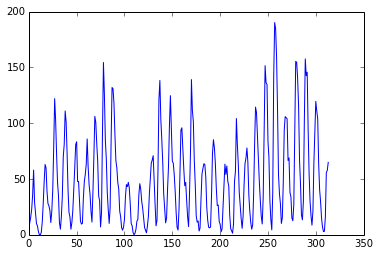

In [65]:
spots=load_sunspots()
plt.plot(spots)

### Sunspot cycle has periodicity

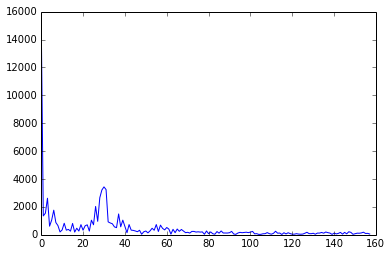

In [67]:
spectrum=rfft(spots)

### "FFT figure"
plt.figure()
plt.plot(abs(spectrum))
plt.savefig('fixed.png')

### Years are not constant length


There's a potential problem with this analysis however:

* Years are not constant length
* Leap years exist
* But, the Fast Fourier Transform assumes evenly spaced intervals


### Uneven time series


The Fast Fourier Transform cannot be applied to uneven time series.

We could:

* Ignore this problem, and assume the effect is small
* Interpolate and resample to even times
* Use a method which is robust to unevenly sampled series, such as LSSA

We also want to find the period of the strongest periodic signal in the data, there are
various different methods we could use for this also, such as integrating the fourier series
by quadrature to find the mean frequency, or choosing the largest single value. 


### Uneven time series design


We could implement a base class for our common code between the different approaches,
and define derived classes for each different algorithmic approach. However, this has drawbacks:

* The constructors for each derived class will need arguments for all the numerical method's control parameters,
such as the degree of spline for the interpolation method, the order of quadrature for integrators, and so on.
* Where we have multiple algorithmic choices to make (interpolator, periodogram, peak finder...) the number
of derived classes would explode: `class SunspotAnalyzerSplineFFTTrapeziumNearMode` is a bit unweildy.
* The algorithmic choices are not then available for other projects
* This design doesn't fit with a clean Ontology of "kinds of things": there's no Abstract Base for spectrogram generators...


### Strategy Pattern for Algorithms


* We implement each algorithm for generating a spectrum as its own Strategy class.
* They all implement a common interface
* Arguments to strategy constructor specify parameters of algorithms, such as spline degree
* One strategy instance for each algorithm is passed to the constructor for the overall analysis


### Strategy Pattern for Algorithms


First, we'll define a helper class for our time series.



In [69]:
class Series(object):
    """Enhance NumPy N-d array with some helper functions for clarity"""
    def __init__(self, data):
        self.data=array(data)
        self.count=self.data.shape[0]
        self.start=self.data[0,0]
        self.end=self.data[-1,0]
        self.range=self.end-self.start
        self.step=self.range/self.count
        self.times=self.data[:,0]
        self.values=self.data[:,1]
        self.plot_data=[self.times,self.values]
        self.inverse_plot_data=[1.0/self.times[20:], self.values[20:]]

### Strategy Pattern for Algorithms


Then, our class which contains the analysis code, *except* the numerical methods




In [70]:
class AnalyseSunspotData(object):
    def format_date(self, date):
        date_format="%Y-%m-%d"
        return datetime.strptime(date,date_format)
    
    def load_data(self):
        start_date_str='1700-12-31'
        end_date_str='2014-01-01'
        self.start_date=self.format_date(start_date_str)
        end_date=self.format_date(end_date_str)
        url_base=("http://www.quandl.com/api/v1/datasets/"+
                  "SIDC/SUNSPOTS_A.csv")
        x=requests.get(url_base,params={'trim_start':start_date_str,
                                        'trim_end':end_date_str,
                                        'sort_order':'asc'})
        secs_per_year=(datetime(2014,1,1)-datetime(2013,1,1)
                ).total_seconds()
        data=csv.reader(StringIO(x.text)) #Convert requests
                                          #result to look
                                          #like a file buffer before
                                          #reading with CSV
        data.next() # Skip header row
        self.series=Series([[
                (self.format_date(row[0])-self.start_date
                    ).total_seconds()/secs_per_year
                 ,float(row[1])] for row in data])
        
    def __init__(self, frequency_strategy):
        self.load_data()
        self.frequency_strategy=frequency_strategy
        
    def frequency_data(self):
        return self.frequency_strategy.transform(self.series)

### Strategy Pattern for Algorithms


Our existing simple fourier strategy




In [71]:
class FourierNearestFrequencyStrategy(object):
    def transform(self, series):
        transformed=fft(series.values)[0:series.count/2]
        frequencies=fftfreq(series.count, series.step)[0:series.count/2]
        return Series(zip(frequencies, abs(transformed)/series.count))

### Strategy Pattern for Algorithms


A strategy based on interpolation to a spline




In [72]:
class FourierSplineFrequencyStrategy(object):
    def next_power_of_two(self, value):
        "Return the next power of 2 above value"
        return 2**(1+int(log(value)/log(2)))

    def transform(self, series):
        spline=UnivariateSpline(series.times, series.values)
        # Linspace will give us *evenly* spaced points in the series
        fft_count= self.next_power_of_two(series.count)
        points=linspace(series.start,series.end,fft_count)
        regular_xs=[spline(point) for point in points]
        transformed=fft(regular_xs)[0:fft_count/2]
        frequencies=fftfreq(fft_count,
                series.range/fft_count)[0:fft_count/2]
        return Series(zip(frequencies, abs(transformed)/fft_count))

### Strategy Pattern for Algorithms


A strategy using the Lomb-Scargle Periodogram




In [73]:
class LombFrequencyStrategy(object):
    def transform(self,series):
        frequencies=array(linspace(1.0/series.range,
            0.5/series.step,series.count))
        result= lombscargle(series.times,
                series.values,2.0*math.pi*frequencies)
        return Series(zip(frequencies, sqrt(result/series.count)))

### Strategy Pattern for Algorithms


Define our concrete solutions with particular strategies




In [74]:
fourier_model=AnalyseSunspotData(FourierSplineFrequencyStrategy())
lomb_model=AnalyseSunspotData(LombFrequencyStrategy())
nearest_model=AnalyseSunspotData(FourierNearestFrequencyStrategy())

### Strategy Pattern for Algorithms


Use these new tools to compare solutions




In [75]:
comparison=fourier_model.frequency_data().inverse_plot_data+['r']
comparison+=lomb_model.frequency_data().inverse_plot_data+['g']
comparison+=nearest_model.frequency_data().inverse_plot_data+['b']

deviation=365*(fourier_model.series.times-linspace(
    fourier_model.series.start,
    fourier_model.series.end,
    fourier_model.series.count))

### Comparison of different algorithms for frequency spectrum of sunspots.

(0, 16)

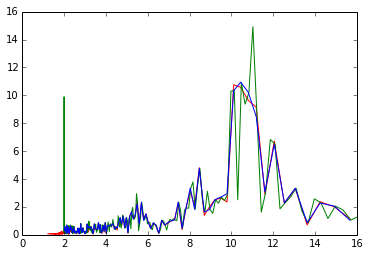

In [76]:
plt.plot(*comparison)
plt.xlim(0,16)

### Deviation of year length from average

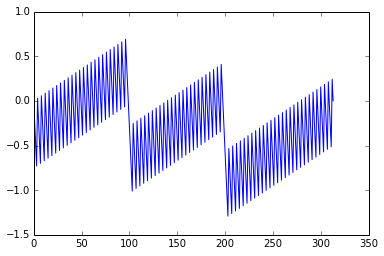

In [77]:
plt.plot(deviation)

## Model-View-Controller

### Separate graphics from science!


Whenever we are coding a simulation or model we want to:

* Implement the maths of the model
* Visualise, plot, or print out what is going on.

We often see scientific programs where the code which is used to display what is happening is mixed up with the
mathematics of the analysis. This is hard to understand.

We can do better by separating the `Model` from the `View`, and using a "`Controller`" to manage them.


### Model

In [76]:
import numpy as np

class Model(object):
    def __init__(self):
        self.positions=np.random.rand(100,2)
        self.speeds=np.random.rand(100,2)+np.array([-0.5,-0.5])[np.newaxis,:]
        self.deltat=0.01
    
    def simulation_step(self):
        self.positions += self.speeds * self.deltat
    
    def agent_locations(self):
        return self.positions

### View

In [77]:
class View(object):
    def __init__(self, model):
        from matplotlib import pyplot as plt
        self.figure=plt.figure()
        axes=plt.axes()
        self.model=model
        self.scatter=axes.scatter(model.agent_locations()[:,0],
                model.agent_locations()[:,1])
        
    def update(self):
        self.scatter.set_offsets(self.model.agent_locations())

### Controller

In [78]:
class Controller(object):
    def __init__(self):
        self.model=Model() # Or use Builder
        self.view=View(self.model)
        def animate(frame_number):
            self.model.simulation_step()
            self.view.update()
        self.animator=animate
        
    def go(self):
        from JSAnimation import IPython_display
        from matplotlib import animation
        anim = animation.FuncAnimation(self.view.figure, self.animator, frames=200, interval=50)
        return anim

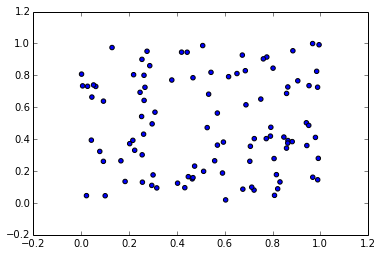

In [79]:
contl=Controller()


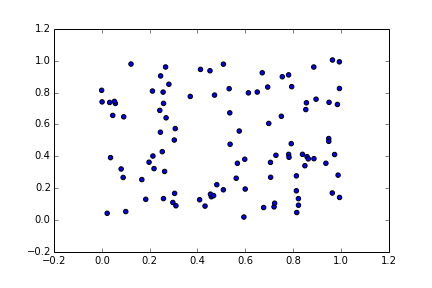
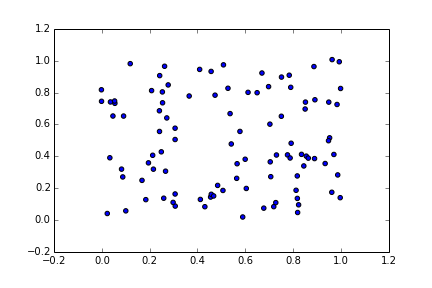
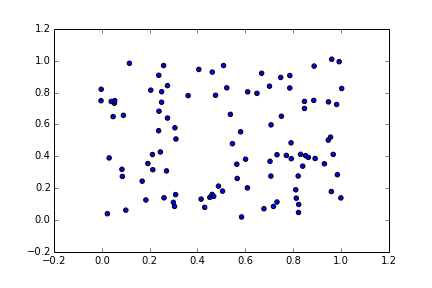
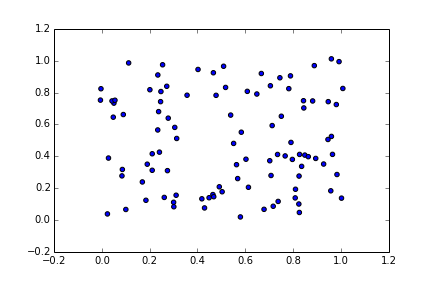
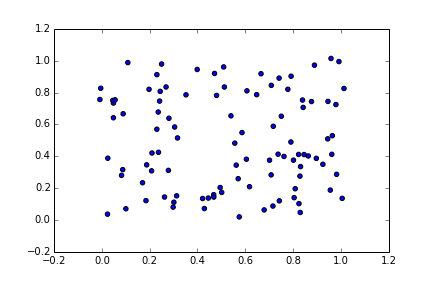
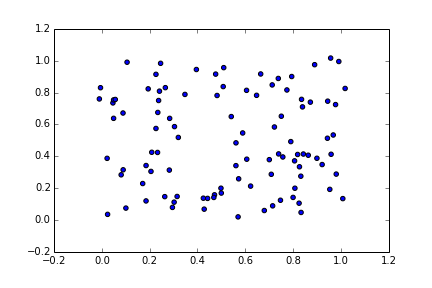
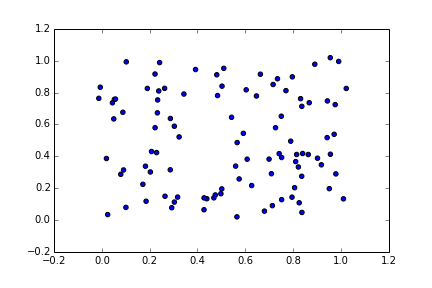
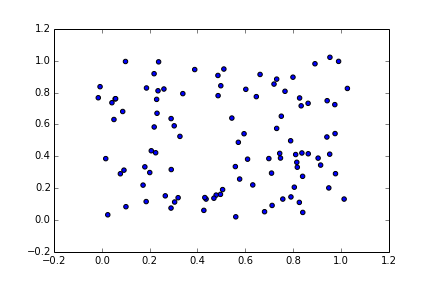
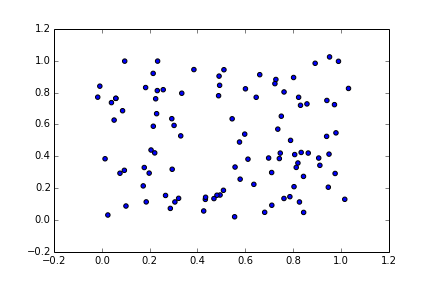
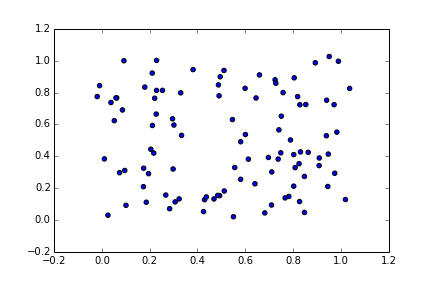
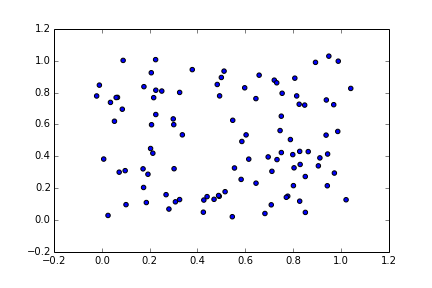
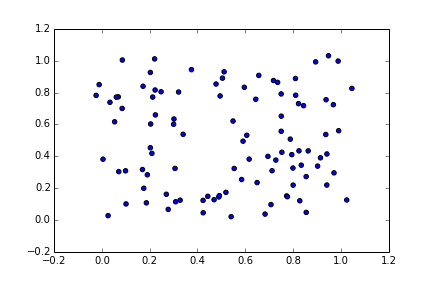
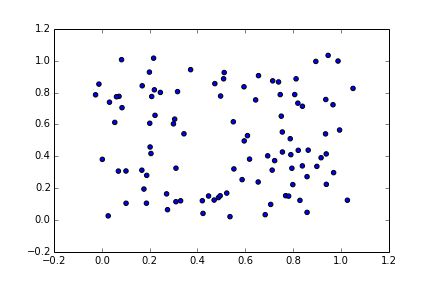
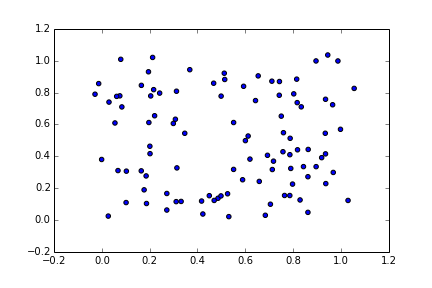
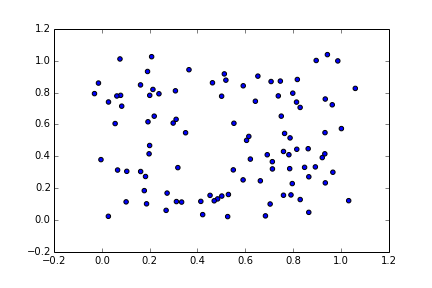
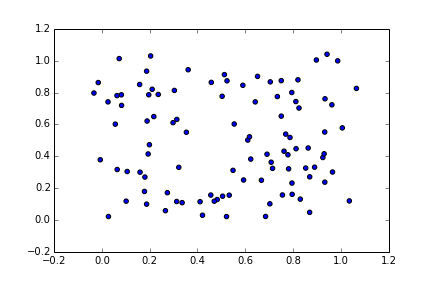
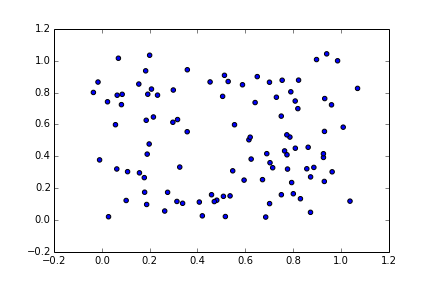
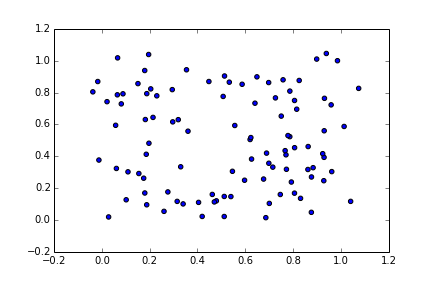
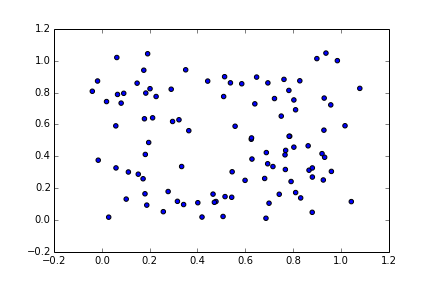
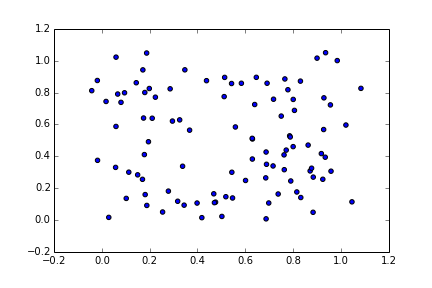
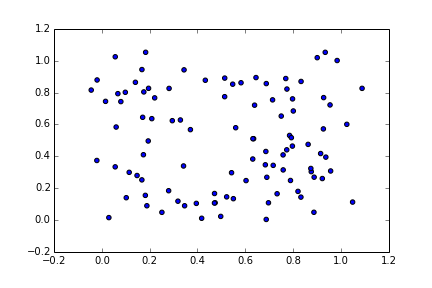
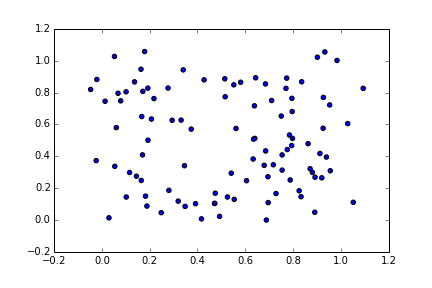
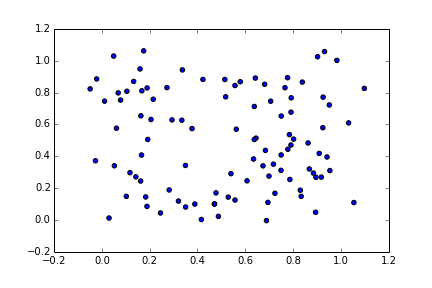
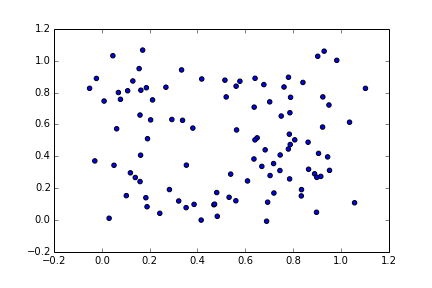
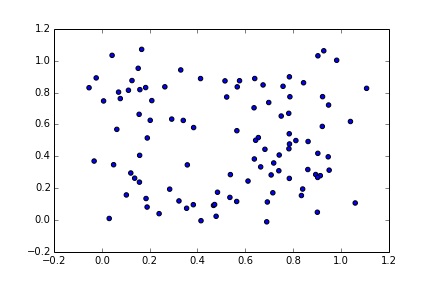
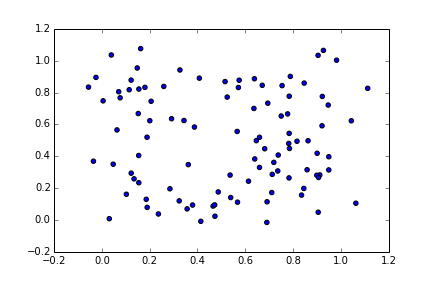
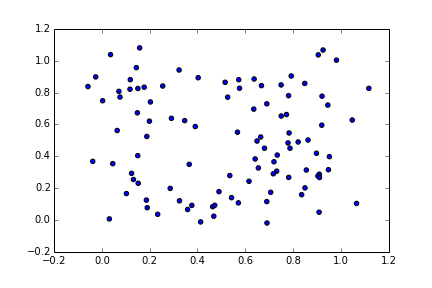
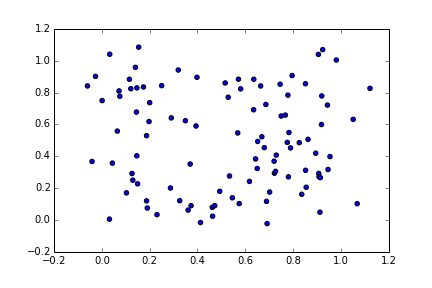
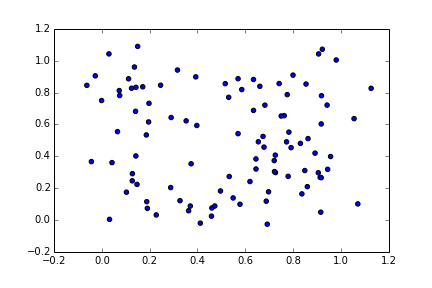
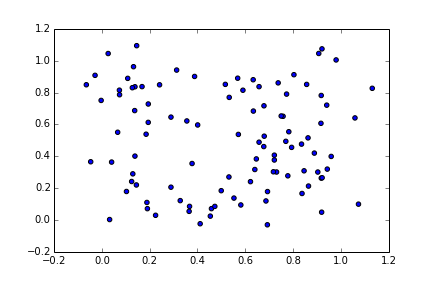
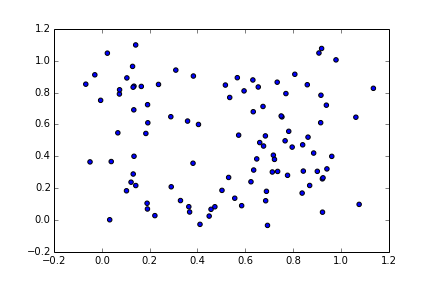
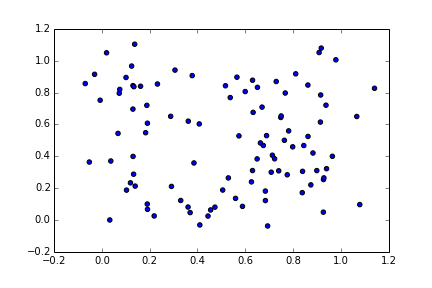
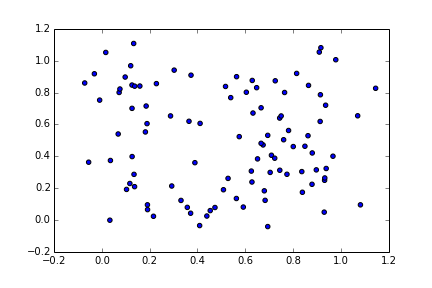
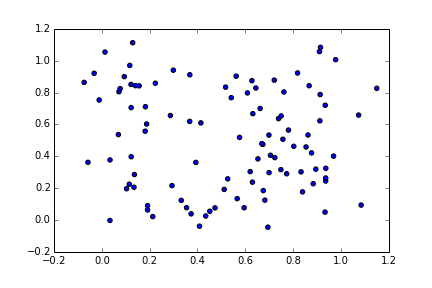
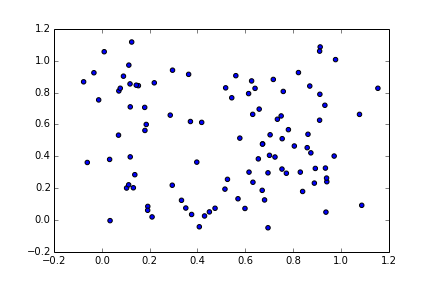
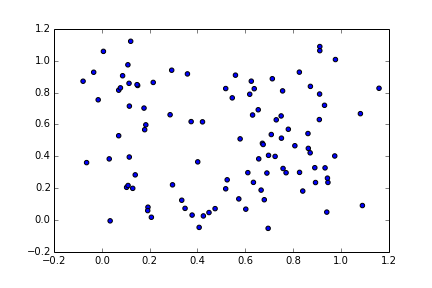
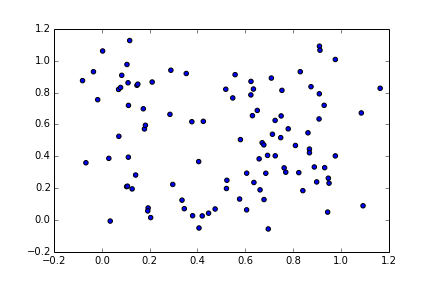
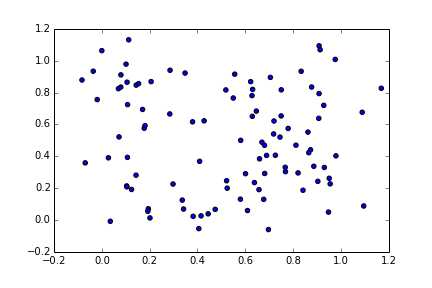
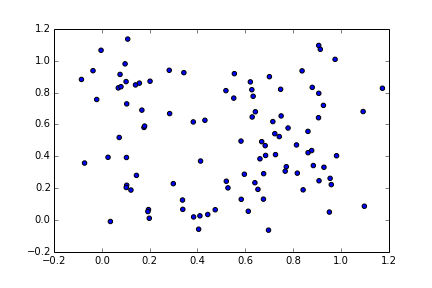
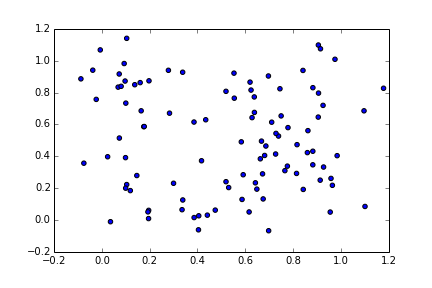
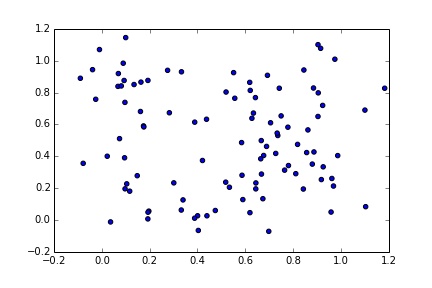
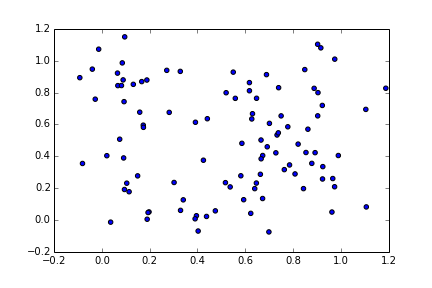
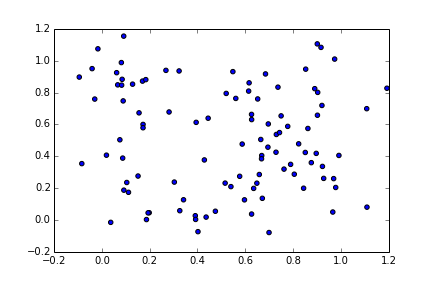
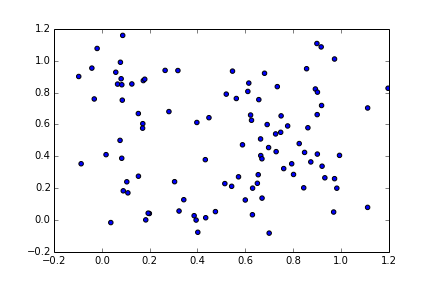
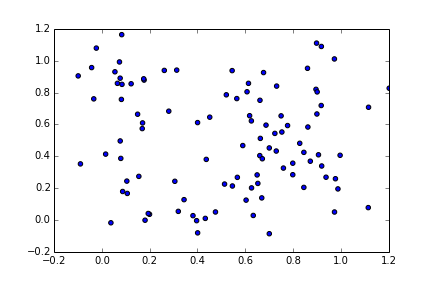
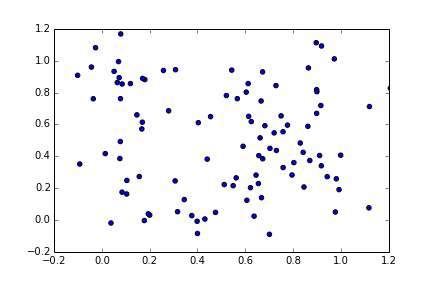
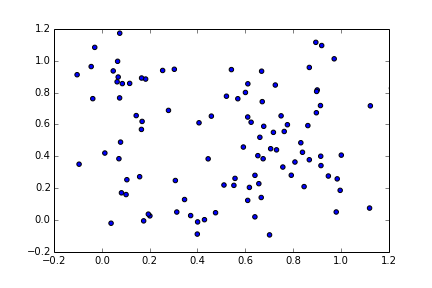
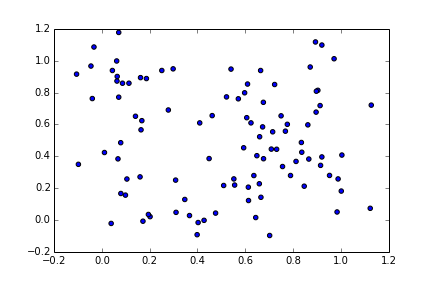
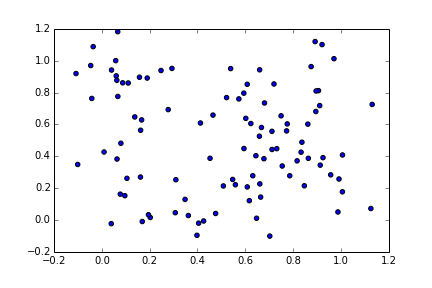
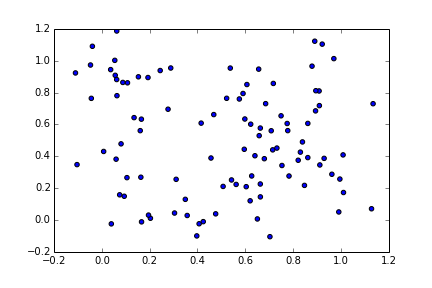
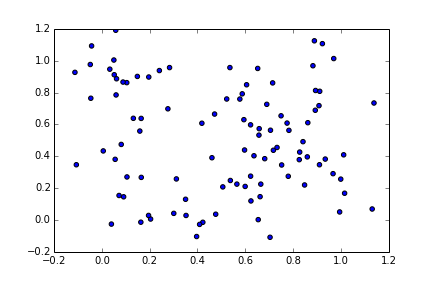
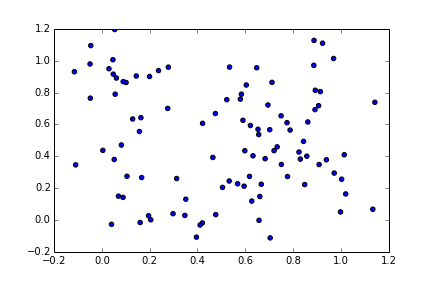
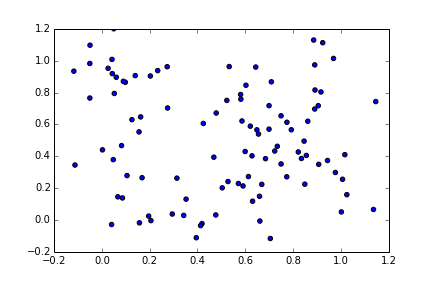
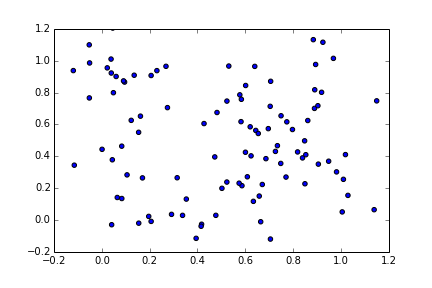
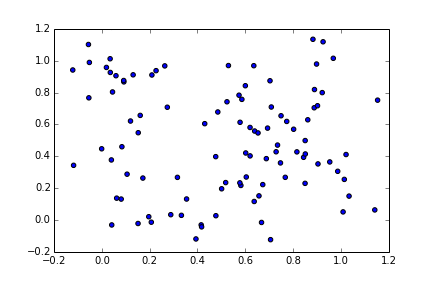
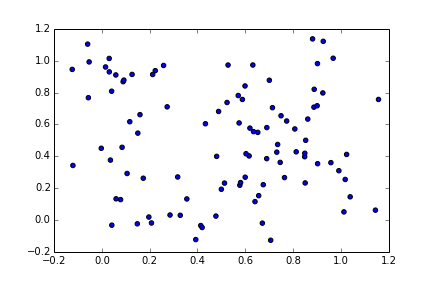
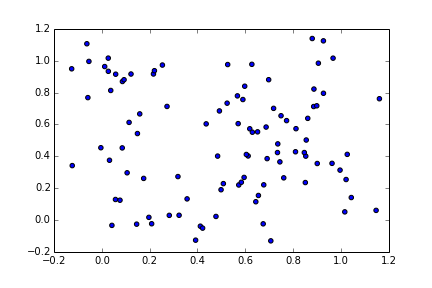
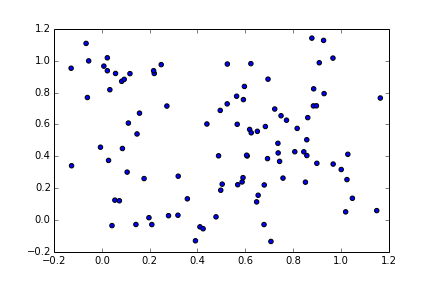
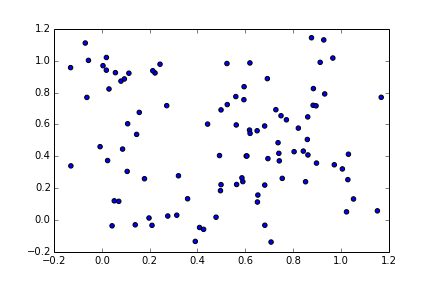
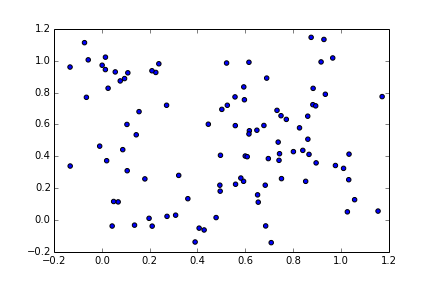
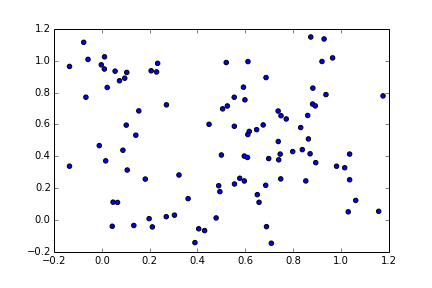
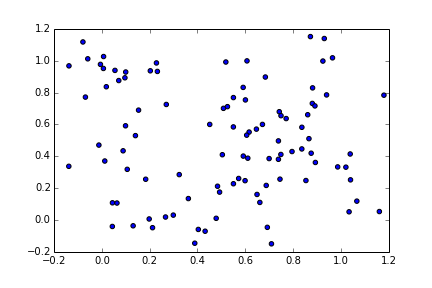
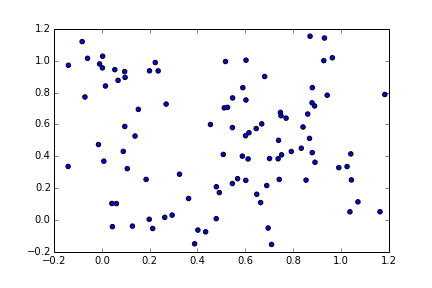
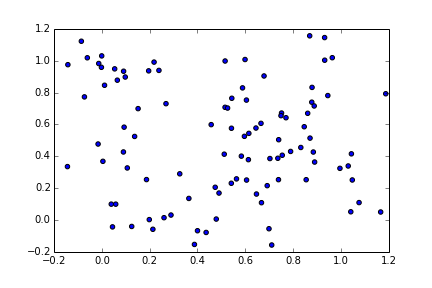
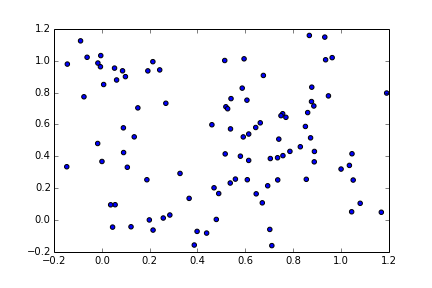
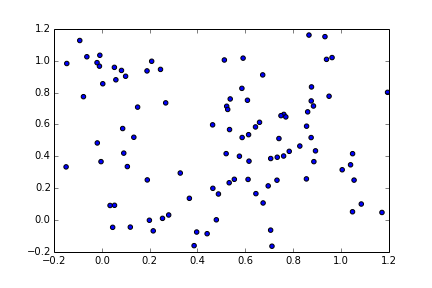
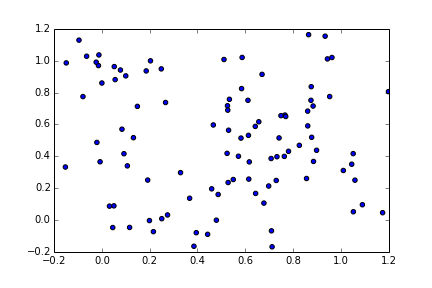
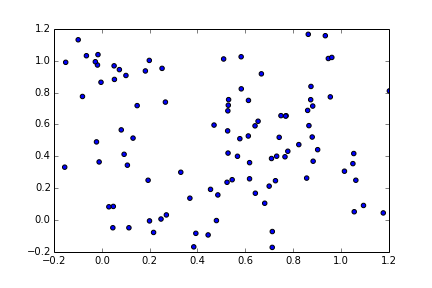
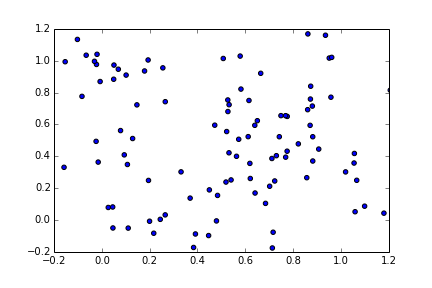
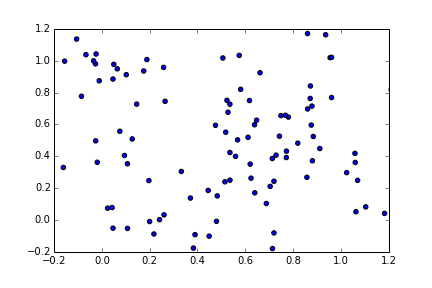
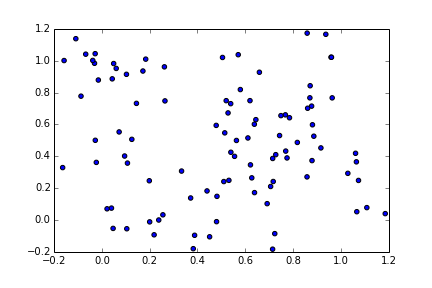
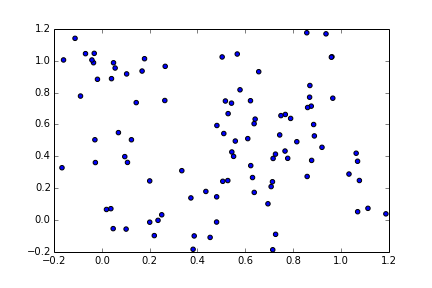
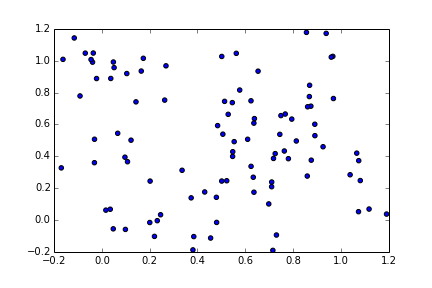
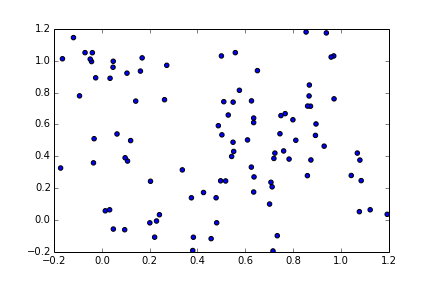
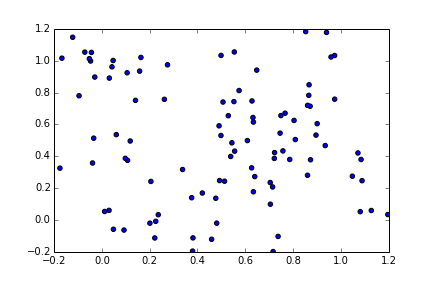
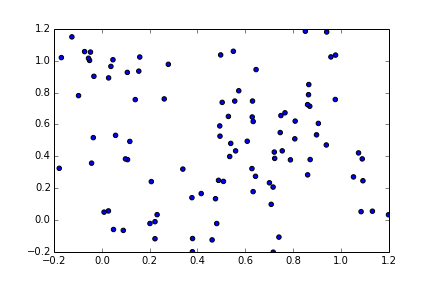
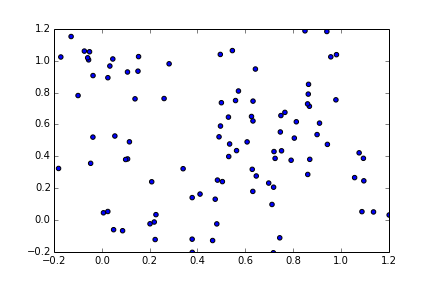
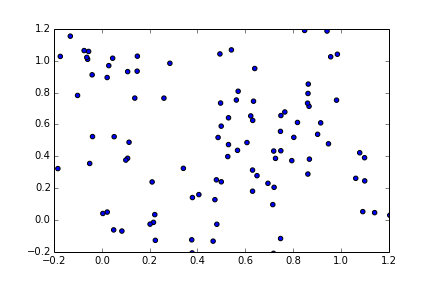
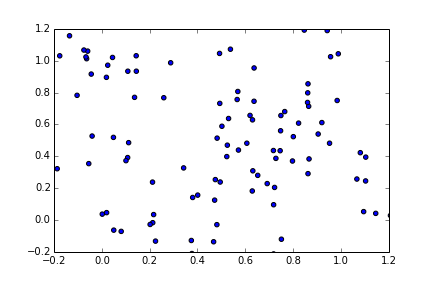
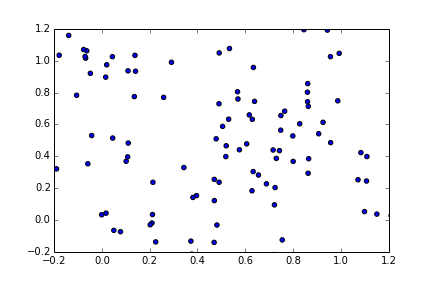
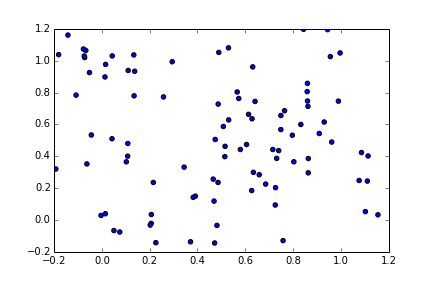
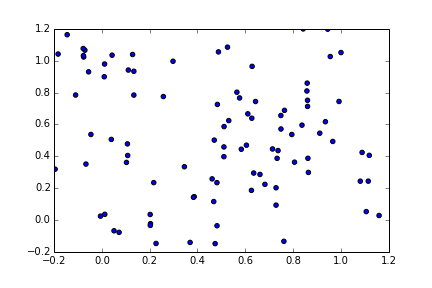
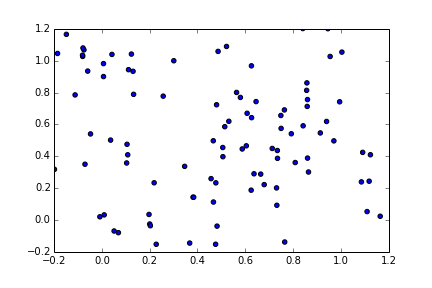
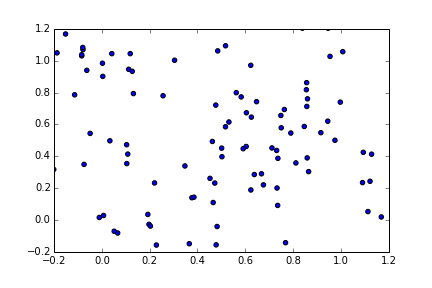
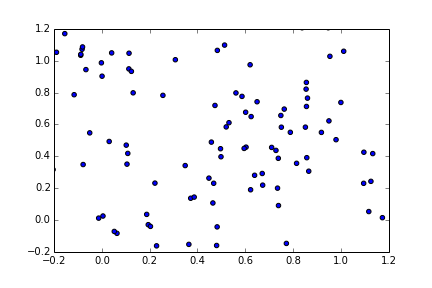
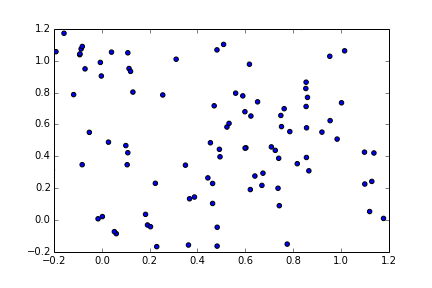
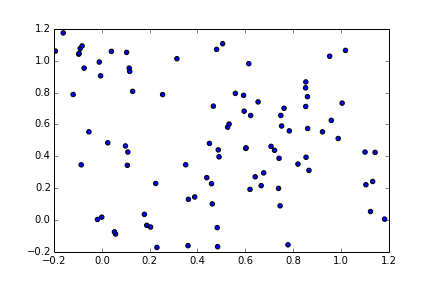
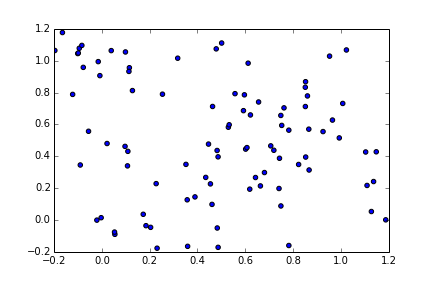
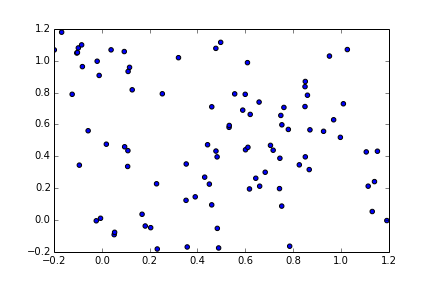
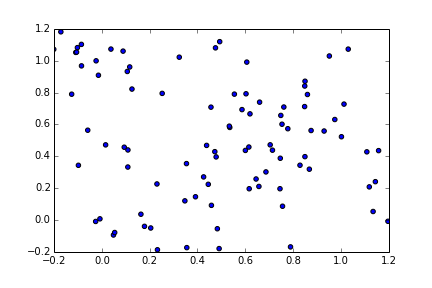
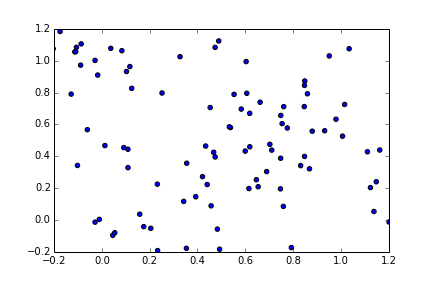
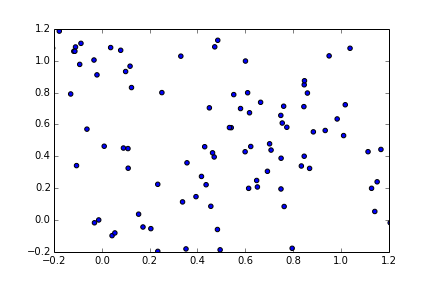
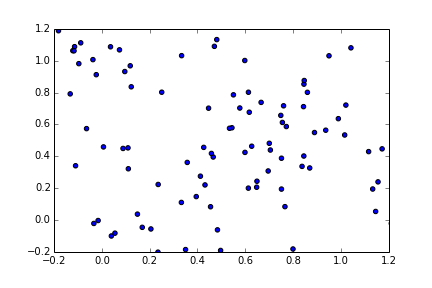
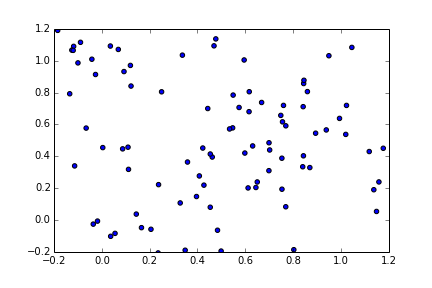
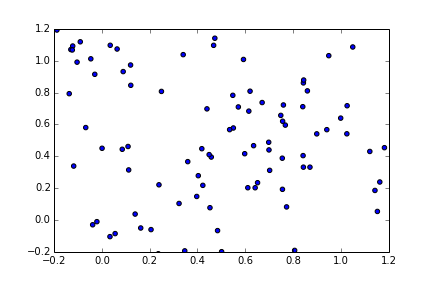
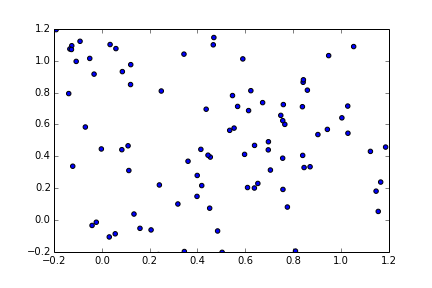
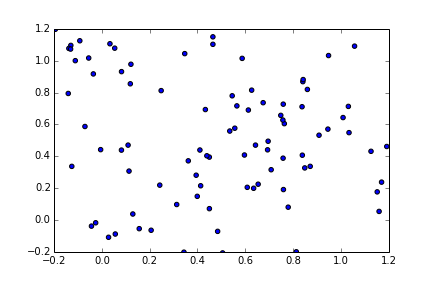
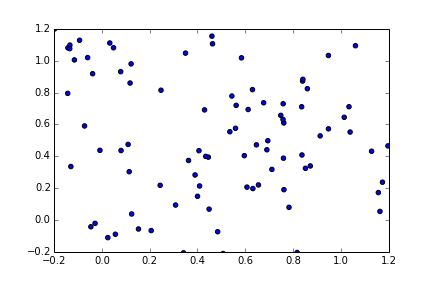
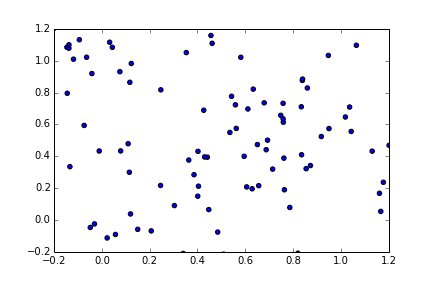
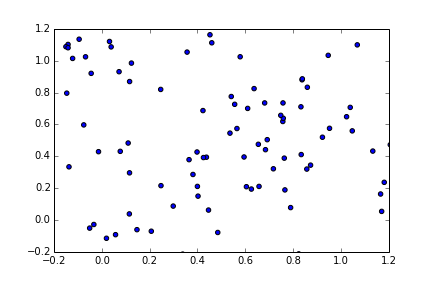
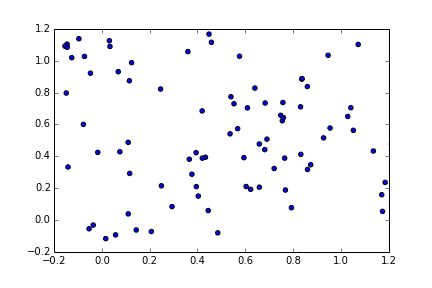
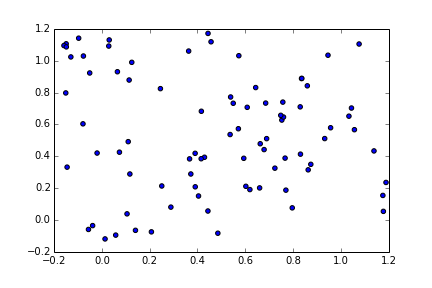
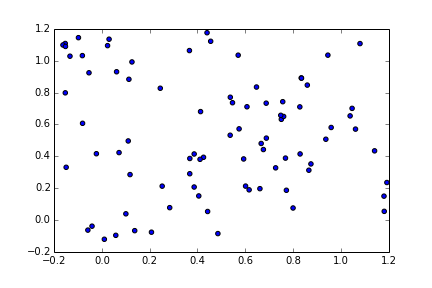
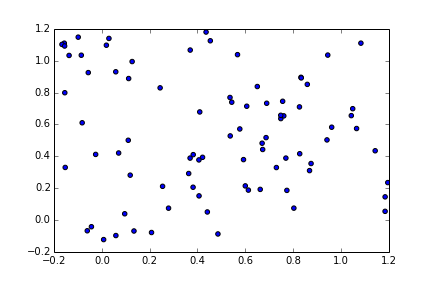
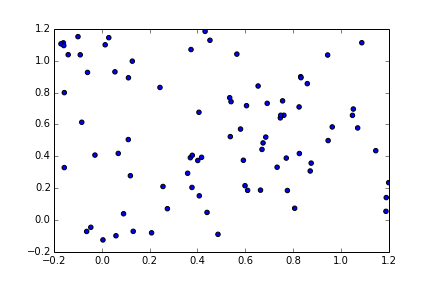
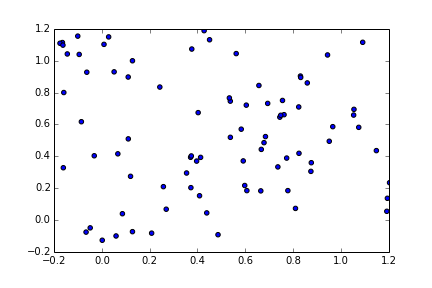
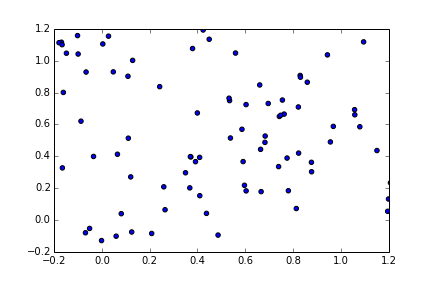
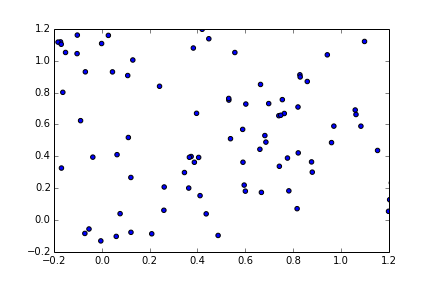
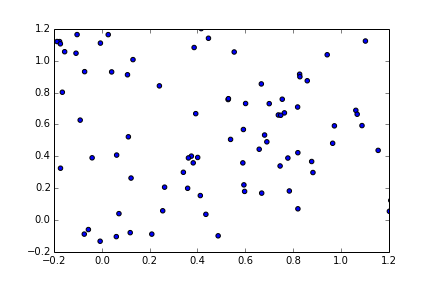
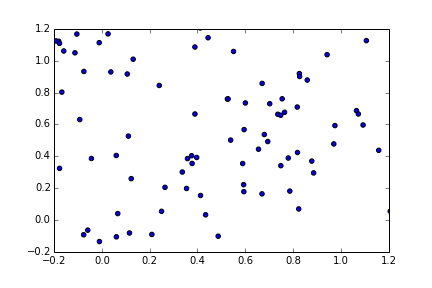
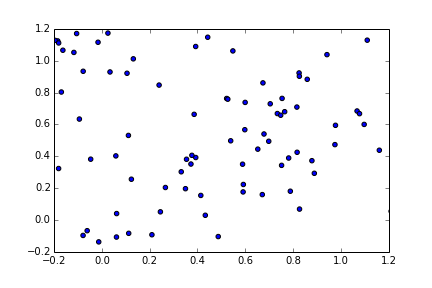
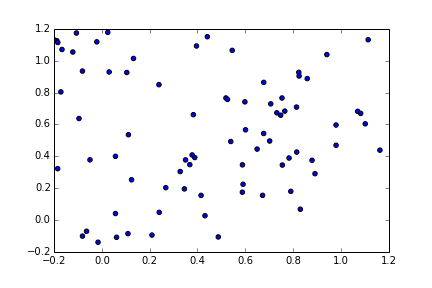
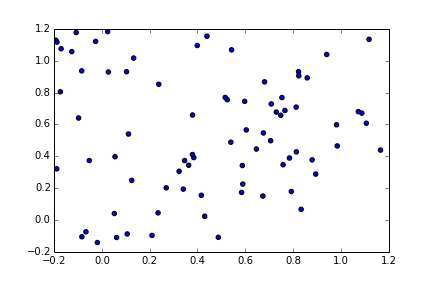
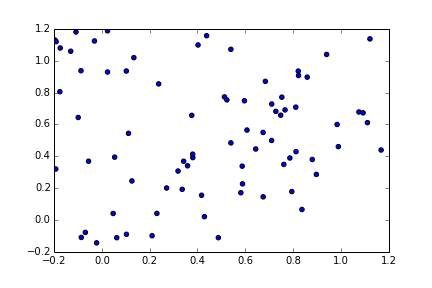
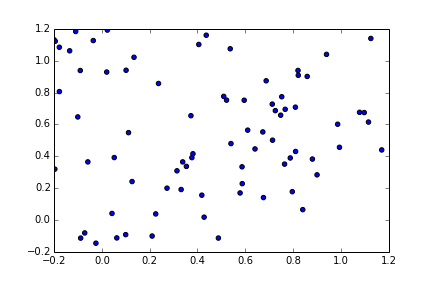
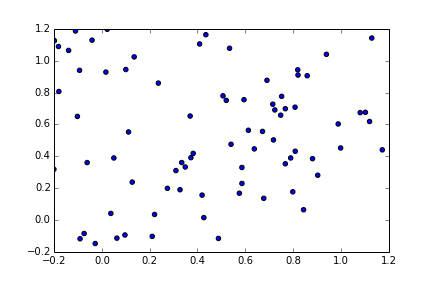
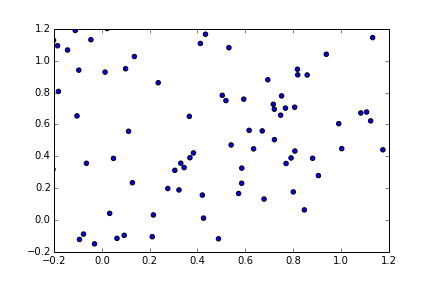
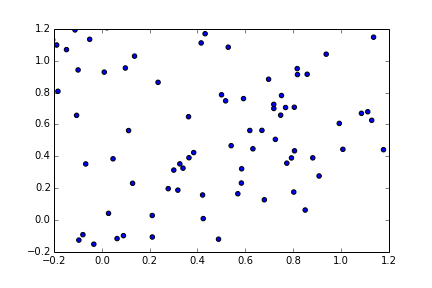
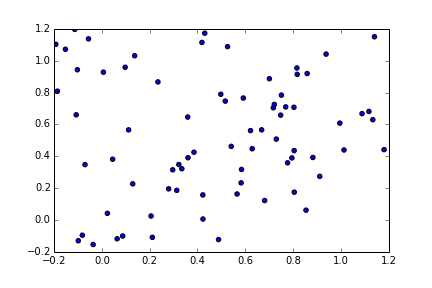
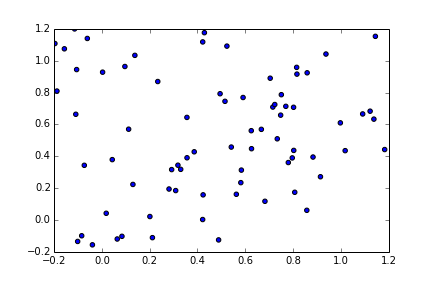
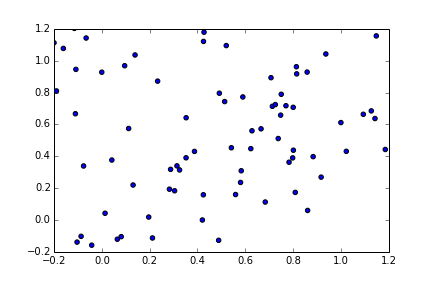
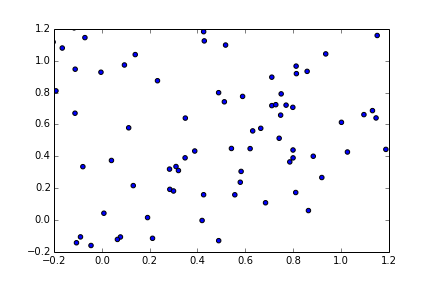
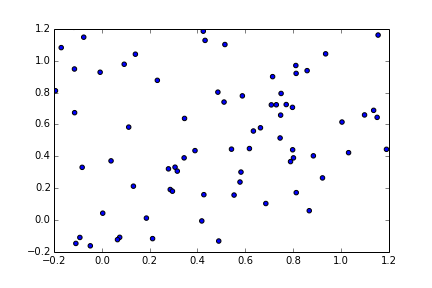
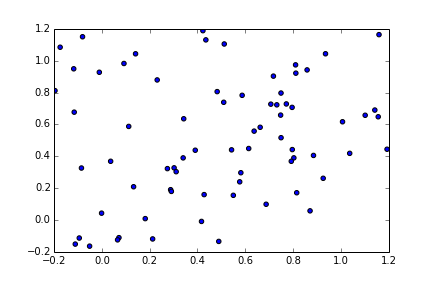
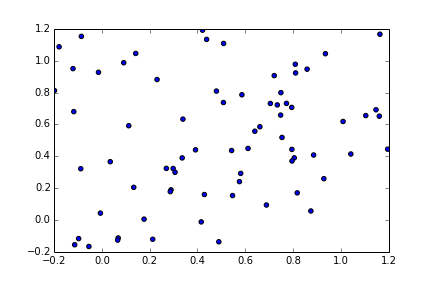
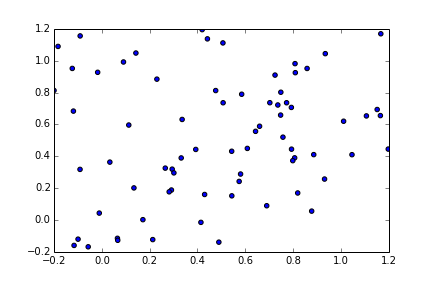
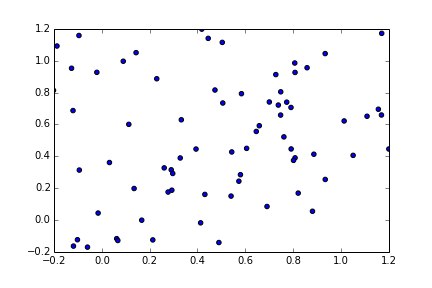
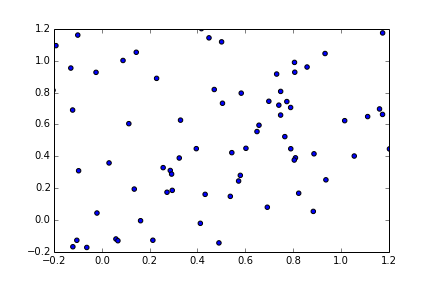
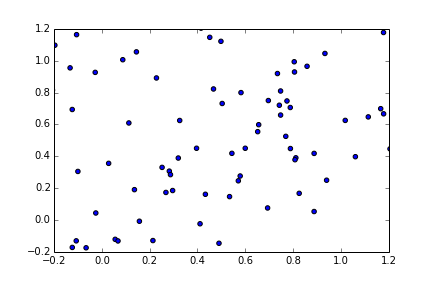
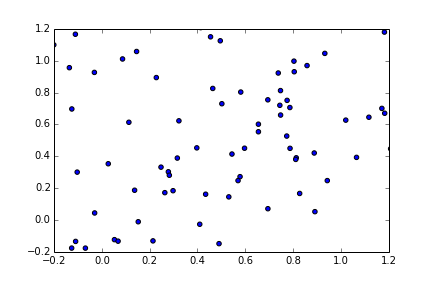
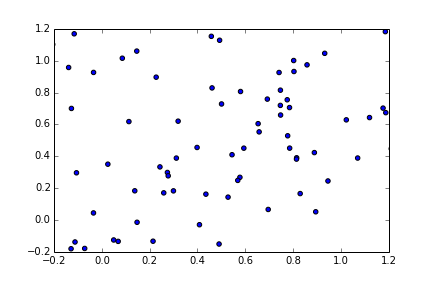
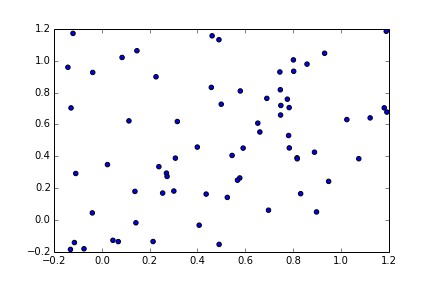
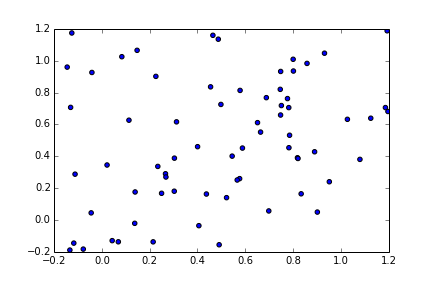
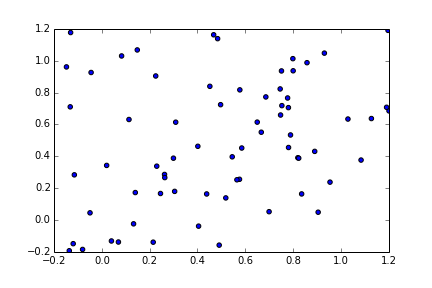
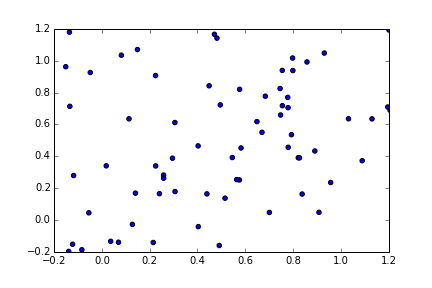
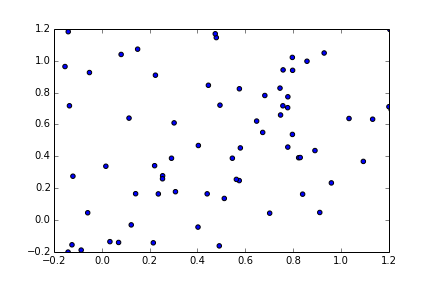
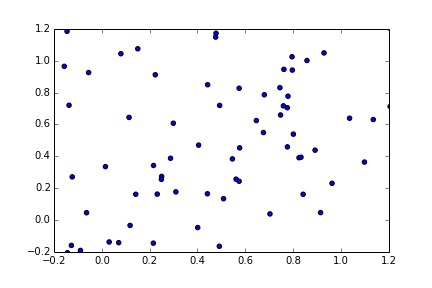
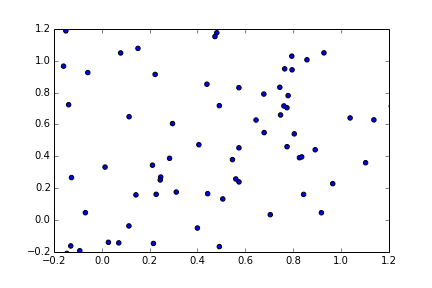
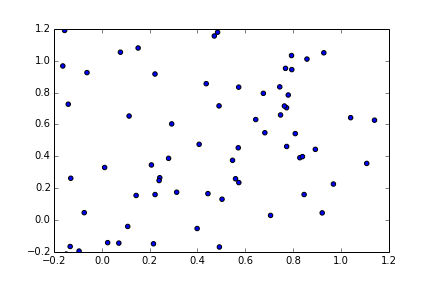
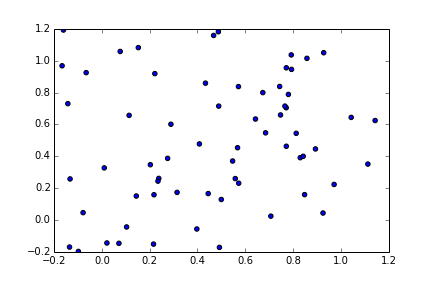
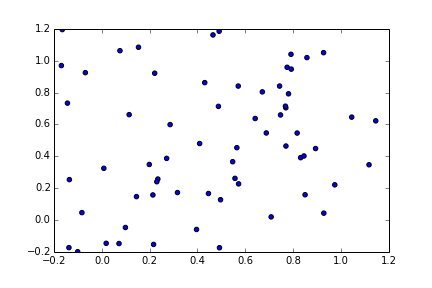
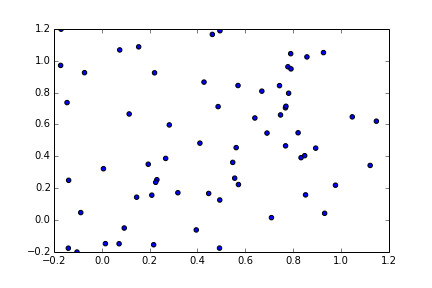
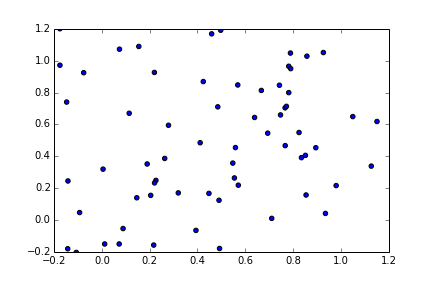
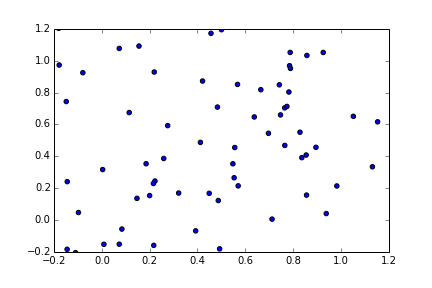
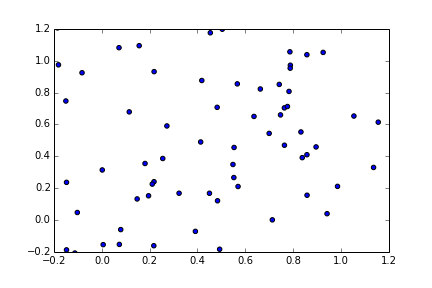
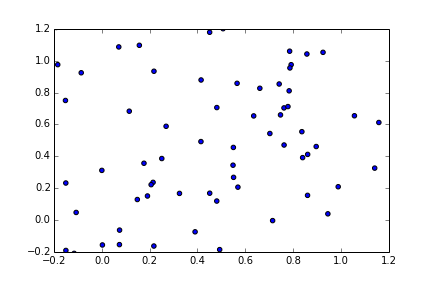
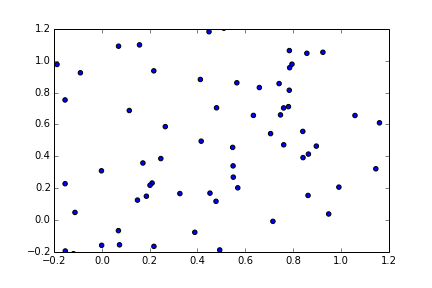
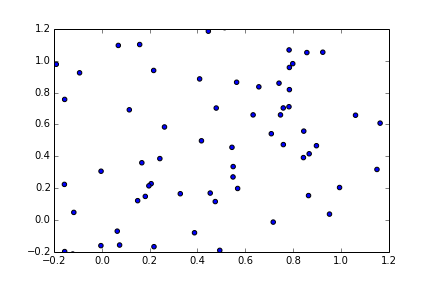
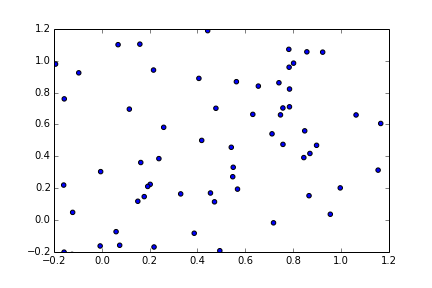
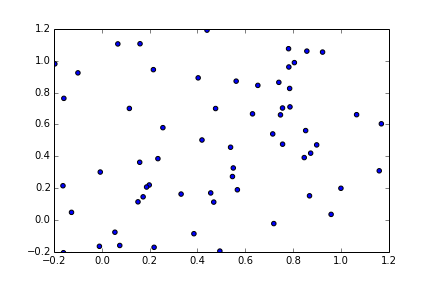
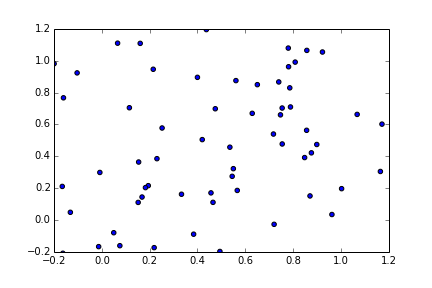
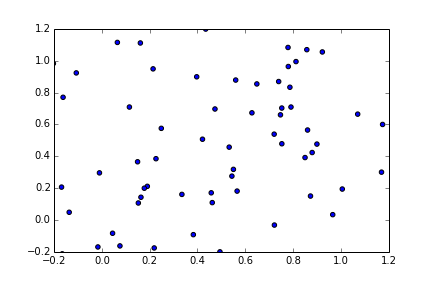
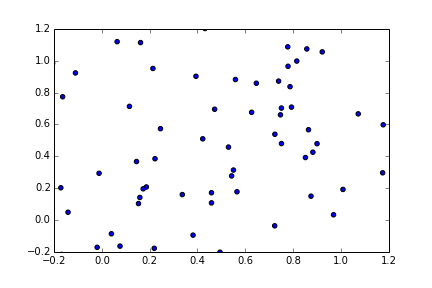
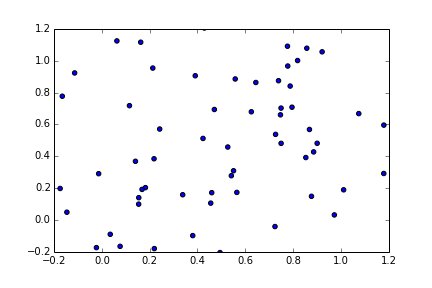
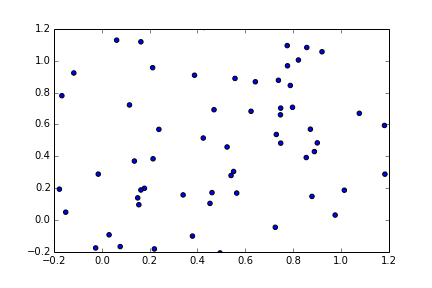
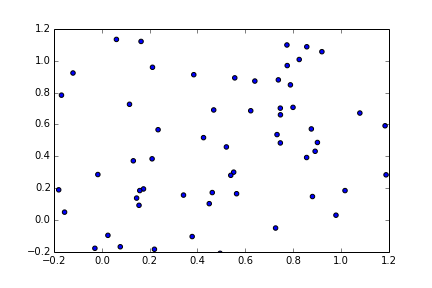
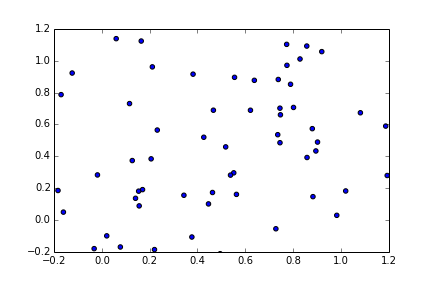
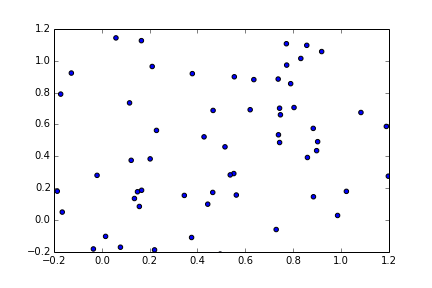
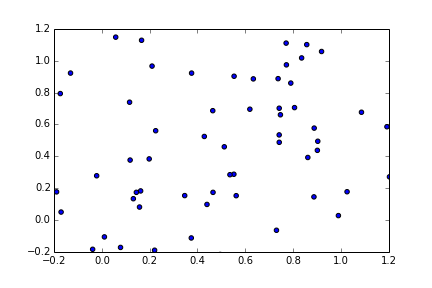
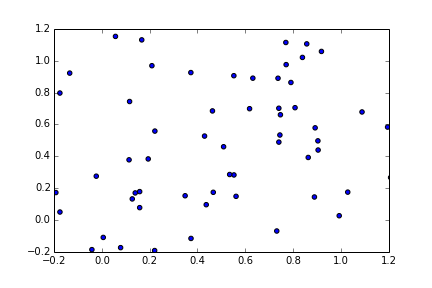
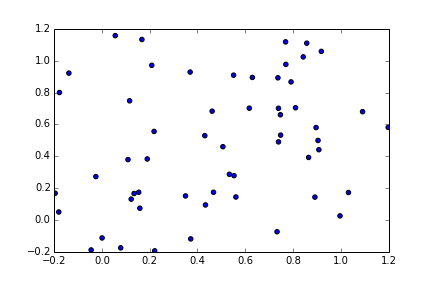
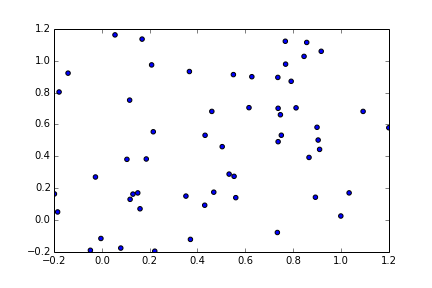
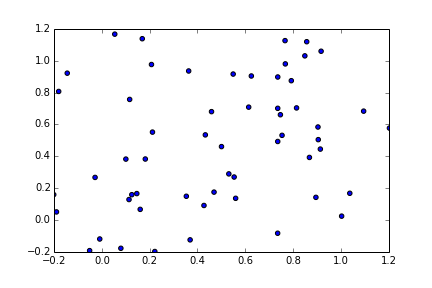
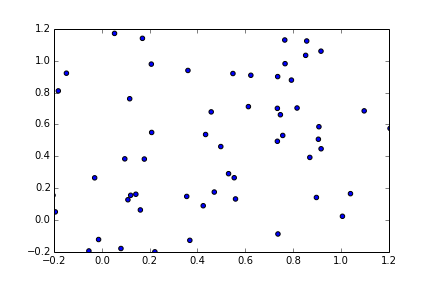
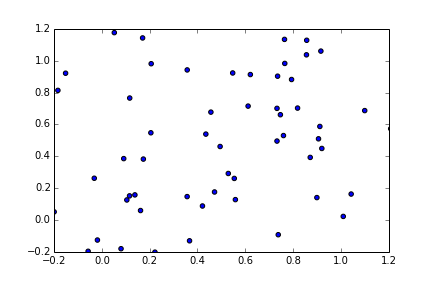
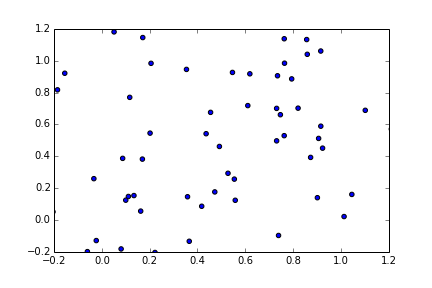
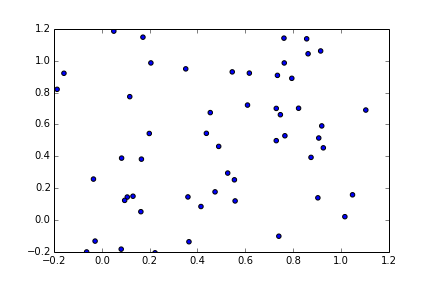
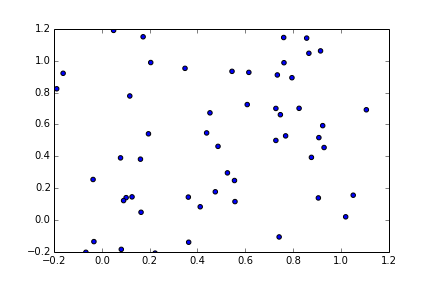
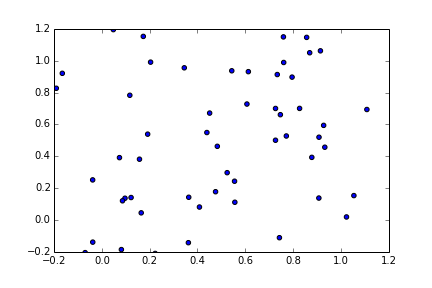
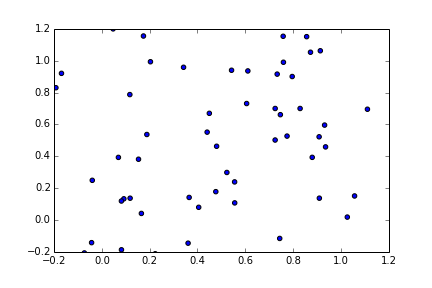
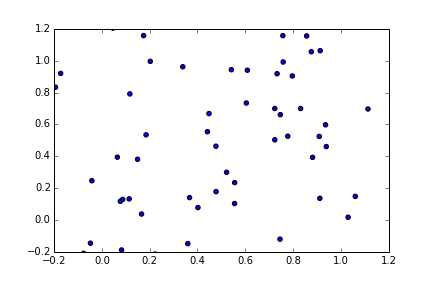
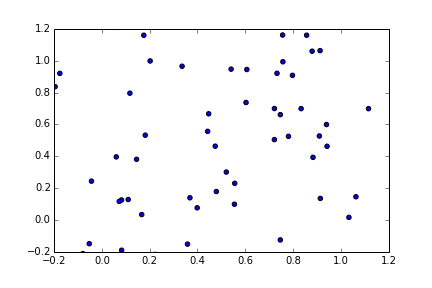
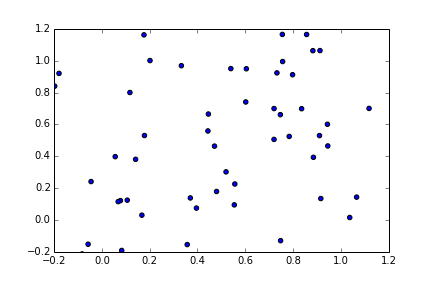
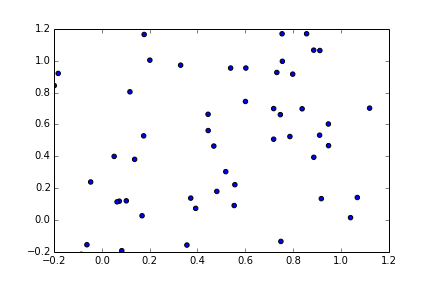
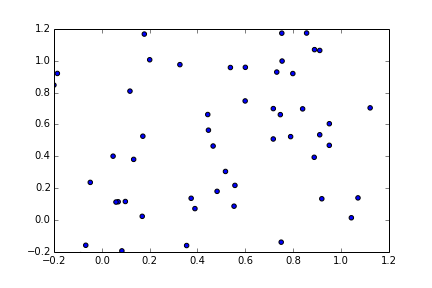
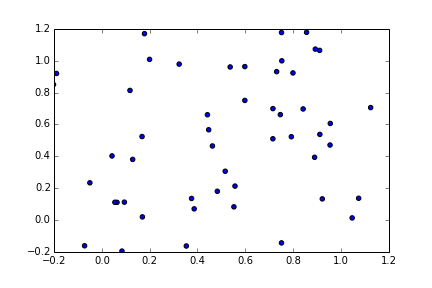
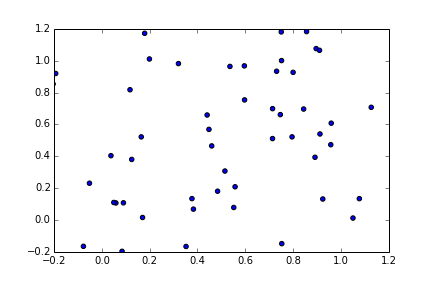
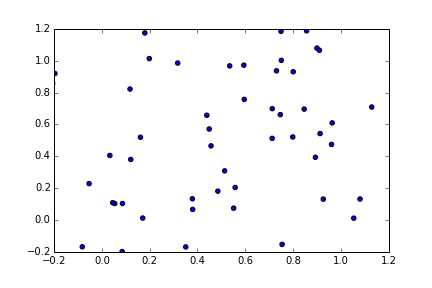
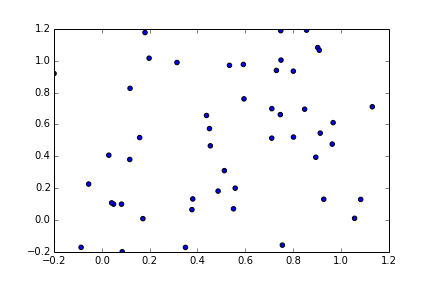
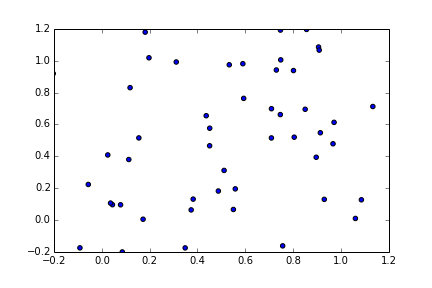
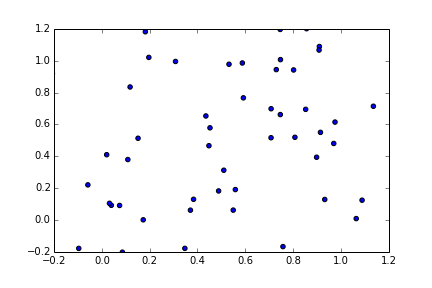
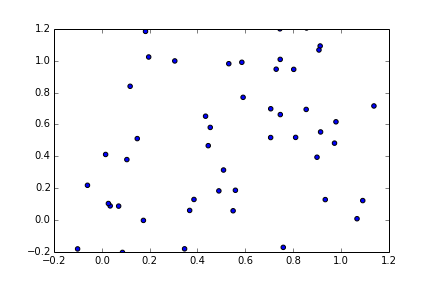
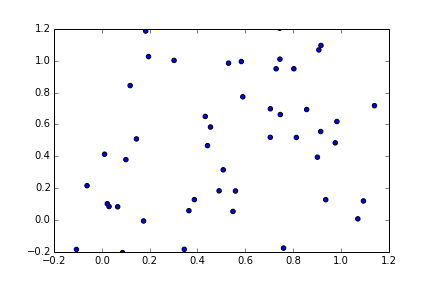
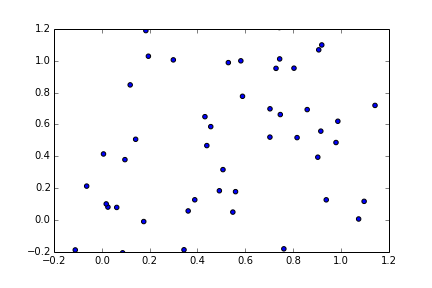
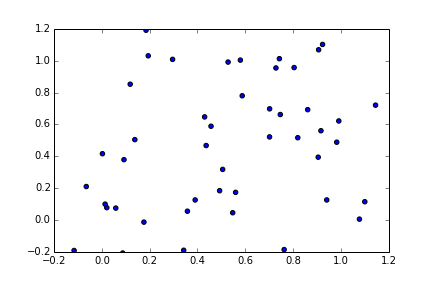
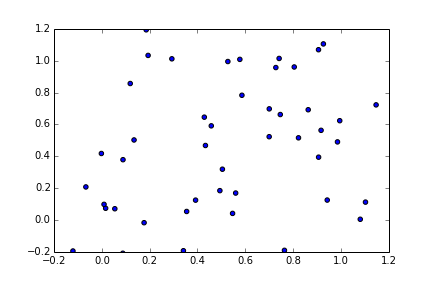
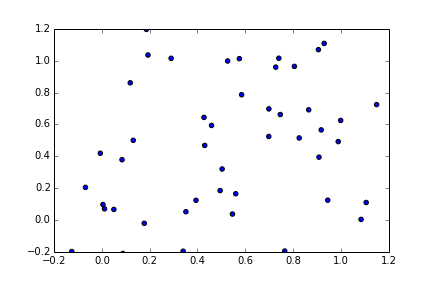
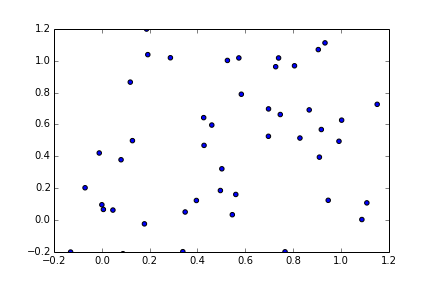
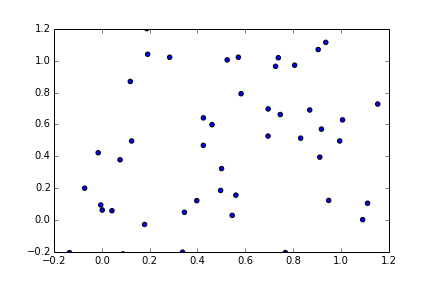
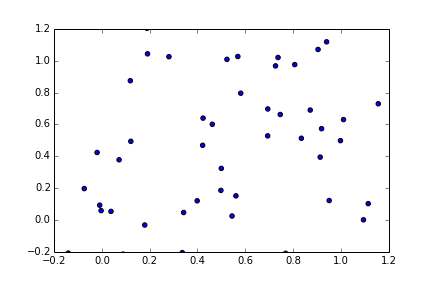
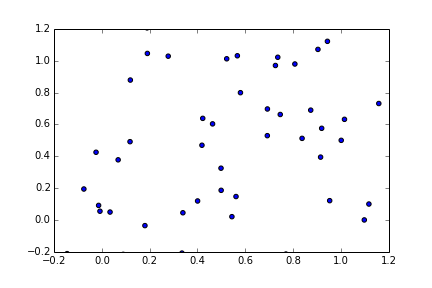
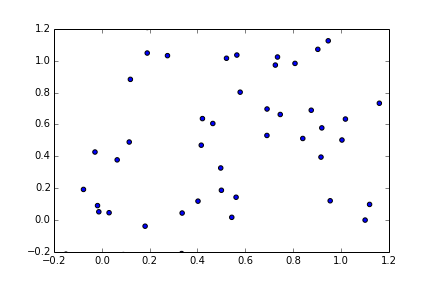
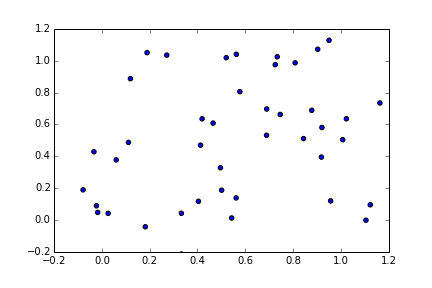
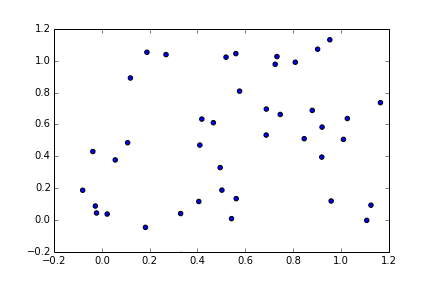
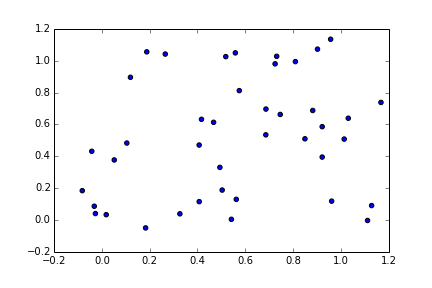
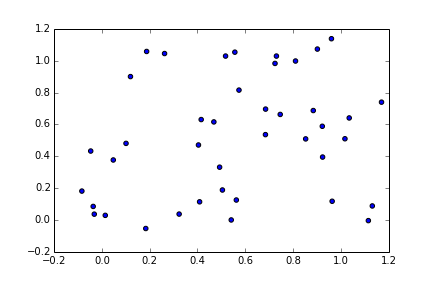
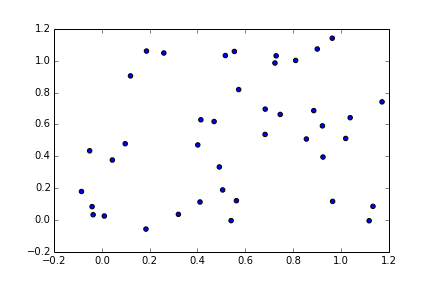
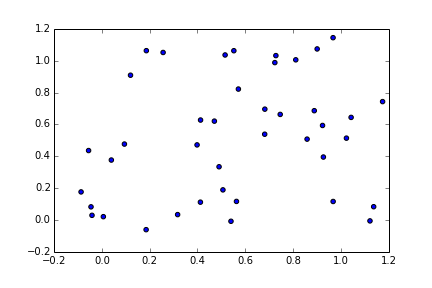
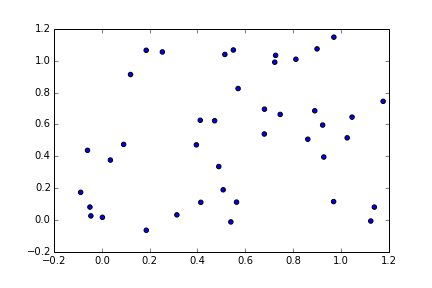
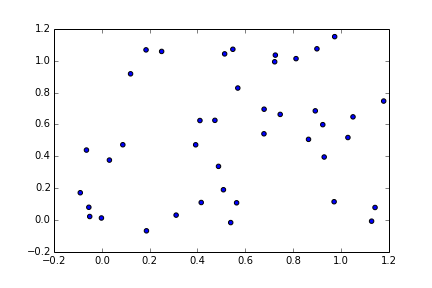

In [80]:
from matplotlib import pyplot as plt
%matplotlib inline

contl.go()

## Engineering

### Software Engineering Stages


* Requirements
* Functional Design
* Architectural Design
* Implementation
* Integration


### Requirements Engineering


Requirements capture obviously means describing the things the software needs to be able to do.

A common approach is to write down lots of "user stories", describing how the software helps the user achieve something:

> As a clinician, when I finish an analysis, I want a report to be created on the test results, so that I can
> send it to the patient.

As a *role*, when *condition or circumstance applies* I want *a goal or desire* so that *benefits occur*.

These are easy to map into the Gherkin behaviour driven design test language.


### Functional and architectural design


Engineers try to separate the functional design, how the software appears to and is used by the user, from the
architectural design, how the software achieves that functionality.

Changes to functional design require users to adapt, and are thus often more costly than changes to architectural design.


### Waterfall


The _Waterfall_ design philosophy argues that the elements of design should occur in order: first requirements capture, then functional design,
then architectural design. This approach is based on the idea that if a mistake is made in the design, then programming effort is wasted,
so significant effort is spent in trying to ensure that requirements are well understood and that the design is correct before programming starts.


### Why Waterfall?


Without a design approach, programmers resort to designing as we go, typing in code, trying what works, and making it up as we go along.
When trying to collaborate to make software with others this can result in lots of wasted time, software that only the author understands,
components built by colleagues that don't work together, or code that the programmer thinks is nice but that doesn't meet the user's requirements.


### Problems with Waterfall


Waterfall results in a contractual approach to development, building an us-and-them relationship between users, business types, designers, and programmers.

> I built what the design said, so I did my job.

Waterfall results in a paperwork culture, where people spend a long time designing standard forms to document each stage of the design,
with less time actually spent *making things*.

Waterfall results in excessive adherence to a plan, even when mistakes in the design are obvious to people doing the work.


### Software is not made of bricks


The waterfall approach to software engineering comes from the engineering tradition applied to building physical objects,
where Architects and Engineers design buildings, and builders build them according to the design.

Software is intrinsically different:


### Software is not made of bricks


> Software is not the same 'stuff' as that from which physical systems are constructed.
Software systems differ in material respects from physical systems.
Much of this has been rehearsed by Fred Brooks in his classic
['No Silver Bullet'](http://ieeexplore.ieee.org/xpl/login.jsp?reload=true&tp=&arnumber=1663532&url=http%3A%2F%2Fieeexplore.ieee.org%2Fxpls%2Fabs_all.jsp%3Farnumber%3D1663532) paper.
First, complexity and scale are different in the case of software systems: relatively functionally simple software systems comprise more independent parts, placed
in relation to each other, than do physical systems of equivalent functional value.
Second, and clearly linked to this, we do not have well developed components and composition mechanisms from which to build
software systems (though clearly we are working hard on providing these) nor do we have a straightforward mathematical account that
permits us to reason about the effects of composition.


### Software is not made of bricks


> Third, software systems operate in a domain determined principally by arbitrary rules about information and symbolic communication whilst the
operation of physical systems is governed by the laws of physics.
Finally, software is readily changeable and thus is changed, it is used in settings where our uncertainty leads us to anticipate the need to change.

-- Prof. [Anthony Finkelstein](http://blog.prof.so/), UCL Dean of Engineering, and Professor of Software Systems Engineering


### The Agile Manifesto


In 2001, authors including Martin Folwer, Ward Cunningham and Kent Beck met in a Utah ski resort, and published the following manifesto.

 [Manifesto for Agile Software Development](http://agilemanifesto.org/)

 We are uncovering better ways of developing
 software by doing it and helping others do it.
 Through this work we have come to value:

 * _Individuals and interactions_ over processes and tools
 * _Working software_ over comprehensive documentation
 * _Customer collaboration_ over contract negotiation
 *  _Responding to change_ over following a plan

 That is, while there is value in the items on
 the right, we value the items on the left more.


### Agile is not absence of process


> The Agile movement is not anti-methodology, in fact, many of us want to restore credibility to the word methodology.
> We want to restore a balance. We embrace modeling, but not in order to file some diagram in a dusty corporate repository.
> We embrace documentation, but not hundreds of pages of never-maintained and rarely-used tomes. We plan, but recognize the
> limits of planning in a turbulent environment. Those who would brand proponents of XP or SCRUM or any of the other
> Agile Methodologies as "hackers" are ignorant of both the methodologies and the original definition of the term hacker

-- Jim Highsmith.


### Elements of an Agile Process


* Continuous delivery
* Self-organising teams
* Iterative development
* Ongoing design


### Ongoing Design


Agile development doesn't eschew design. Design documents should still be written, but treated as living documents,
updated as more insight is gained into the task, as work is done, and as requirements change.

Use of a Wiki or version control repository to store design documents thus works much better than using Word documents!

Test-driven design and refactoring are essential techniques to ensure that lack of "Big Design Up Front" doesn't produce
badly constructed spaghetti software which doesn't meet requirements. By continously scouring our code for smells, and
stopping to refactor, we evolve towards a well-structured design with weakly interacting units. By starting with tests
which describe how our code should behave, we create executable specifications, giving us confidence that the code does
what it is supposed to.


### Iterative Development


Agile development maintains a backlog of features to be completed and bugs to be fixed. In each iteration, we start with a meeting where
we decide which backlog tasks will be attempted during the development cycle, estimating how long each will take,
and selecting an achievable set of goals for the "sprint". At the end of each cycle, we review the goals completed and missed,
and consider what went well, what went badly, and what could be improved.

We try not to add work to a cycle mid-sprint. New tasks that emerge are added to the backlog, and considered in the next planning meeting.
This reduces stress and distraction.


### Continuous Delivery


In agile development, we try to get as quickly as possible to code that can be *demonstrated* to clients. A regular demo of progress
to clients at the end of each development iteration says so much more than sharing a design document. "Release early, release often"
is a common slogan. Most bugs are found by people *using* code -- so exposing code to users as early as possible will help find bugs quickly.


### Self-organising teams


Code is created by people. People work best when they feel ownership and pride in their work. Division of responsiblities into designers
and programmers results in a ["Code Monkey"](http://open.spotify.com/track/1rIFZk9tTUtHP3vULR5wXe) role, where the craftspersonship and 
sense of responsibility for code quality is lost. Agile approaches encourage programmers, designers, clients, and businesspeople to see
themselves as one team, working together, with fluid roles. Programmers grab issues from the backlog according to interest, aptitude,
and community spirit.


### Agile in Research


Agile approaches, where we try to turn the instincts and practices which emerge naturally when smart programmers get together into
well-formulated best practices, have emerged as antidotes to both the chaotic free-form typing in of code, and the rigid
paperwork-driven approaches of Waterfall.

If these approaches have turned out to be better even in industrial contexts, where requirements for code can be well understood,
they are even more appropriate in a research context, where we are working in poorly understood fields with even less well captured
requirements.


### Conclusion


* Don't ignore design
* See if there's a known design pattern that will help
* Do try to think about how your code will work before you start typing
* Do use design tools like UML to think about your design without coding straight away
* Do try to write down some user stories
* Do maintain design documents.

BUT

* Do change your design as you work, updating the documents if you have them
* Don't go dark -- never do more than a couple of weeks programming without showing what you've done to colleagues
* Don't get isolated from the reasons for your code's existence, stay involved in the research, don't be a Code Monkey.
* Do keep a list of all the things your code needs, estimate and prioritise tasks carefully.



## Exercises

### Refactoring to classes


Complete the exercise on Boids from last week, as far as creating a class for a Boid, if you haven't already.


### Refactoring to Inheritance and Polymorphism


In the Eagle branch in my Boids repository you will find an extension of Boids to support multiple kinds of Bird.
You will see that this suffers from the use of an `if (type)` statement which would be
better implemented with inheritance and polymorphism.

To access the Eagle branch:


### Refactoring to Patterns: Builder


The way in which we construct our Boids model's bird content, specifying each of the
model parameters as a constructor, and add birds using `initialise_random`
and `initialise_from_data` is rather clunky.

Create a `ModelBuilder` class with methods to define model parameters and to
add a random boid and boid or boids from data, using the Builder pattern.

You could even create two subclasses of `ModelBuilder` to build either random boids
or boids from a dataset.


### Refactoring to Patterns: Model/View


You can apply Model/View to create a separate class to visualise boid models using Matplotlib,
and even perhaps write another viewer to visualise the boids in a different way: perhaps as graphs over time
of dispersal, distance from flock to eagle and average velocity.


### Using UML


You should also use [YUML](http://yuml.me) or another UML tool to visualise your class structure.

You don't have to do all these things to pass the assignment: any minimally object-oriented implementation of the boids
will pass.